# Project 4, APS1070 Fall 2020
#### **Linear Regression -  20 points**
**Deadline: Nov 29, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name: Haoying Sun**
*   **Student number: 1002112108**



## Part 1 - Getting Started [1 mark]

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

**1. Print the dataframe.**

In [ ]:
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


**2. Prepare your dataset as follows: [1]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.

In [ ]:
#Splitting the dataset

df_features = df.drop(['Goal'], axis = 1)
df_target = pd.DataFrame(data=df['Goal'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=1)

In [ ]:
#Standardize X_train and X_test

from sklearn.preprocessing import StandardScaler

scaled_X_train = StandardScaler().fit_transform(X_train)
X_train_sd = pd.DataFrame(scaled_X_train, columns=df_features.columns)

scaler = StandardScaler().fit(X_train)
scaled_X_test = scaler.transform(X_test)
X_test_sd = pd.DataFrame(scaled_X_test, columns=df_features.columns)

In [ ]:
#Inserting a column of 1s in X_train and X_test as the first column in the dataframe

X_test_sd.insert(0,'b',1)
X_train_sd.insert(0,'b',1)

## Part 2 - Linear Regression - Direct Solution [2 marks]

Implement the direct solution to linear regression on the training set. **[1]**

Report the root-mean-square error (RMSE) for both the training and validation sets.**[1]**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:
$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

$w = (X^TX + \lambda I)^{-1}X^Tt$

In [ ]:
#Applying direct solution

from scipy.linalg import inv

W = np.dot(inv(np.dot(X_train_sd.T, X_train_sd)), np.dot(X_train_sd.T, y_train))

In [ ]:
#Prediction

y_train_predict = np.dot(X_train_sd, W)
y_test_predict = np.dot(X_test_sd, W)

In [ ]:
#defining a function that calculates RMSE

def rmse(y_predict, y):
  return np.sqrt(mean_squared_error(y_predict, y))
  

In [ ]:
#Calculating rmse for training and testing set

print('The RMSE of the training set is: ', rmse(y_train_predict, y_train))
print('The RMSE of the validation set is: ', rmse(y_test_predict, y_test))


The RMSE of the training set is:  0.00023994788238552192
The RMSE of the validation set is:  0.00022603641471661377


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a full batch gradient descent algorithm and record the training time for our model.

**1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's validation RMSE converges. Here we will consider it converged once validation RMSE is within 0.1% of the Direct Solution RMSE (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$) and will use this value in the next parts too.**

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.**[0.5]**

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). **[0.5]**

Total Training Time: 7.598932981491089 (s)
Number of iteration is: 692
The final RMSE of training is:  0.0002325052046115075
The final RMSE of testing is:  0.00022618509308690483


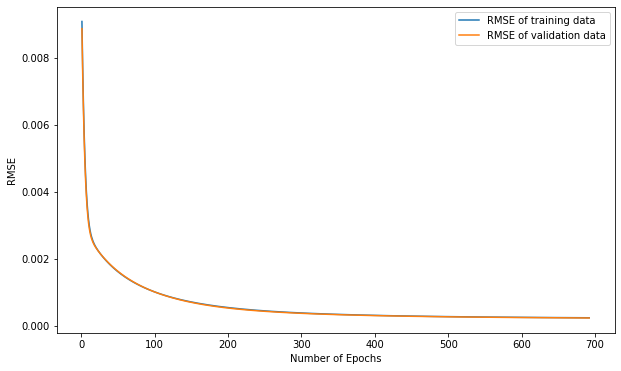

In [ ]:
#Records current time
import time
start_time = time.time() 

#Initializing
W_P3 = (np.random.random(X_train_sd.shape[1])/1000).reshape(1,-1)
y_train_pred_P3 = np.dot(X_train_sd, W_P3.T)
y_val_pred_P3 = np.dot(X_test_sd, W_P3.T)

lr = 0.01
rmse_train_P3 = []
rmse_val_P3 = []
epoch = []
i = 0

RMSE_P3 = rmse(y_val_pred_P3, y_test)
RMSE_direct = rmse(y_test_predict, y_test)
CT = RMSE_direct*1.001

#Using a while loop to do iterations
while (RMSE_P3 > CT):
    gradient = (1/len(y_train) * np.dot(X_train_sd.T, y_train_pred_P3 - y_train)).reshape(1,-1)
    W_P3 = W_P3 - lr * gradient
    y_train_pred_P3 = np.dot(X_train_sd, W_P3.T)
    y_val_pred_P3 = np.dot(X_test_sd, W_P3.T)
    rmse_train_P3.append(rmse(y_train_pred_P3, y_train))
    rmse_val_P3.append(rmse(y_val_pred_P3, y_test))
    RMSE_P3 = rmse(y_val_pred_P3, y_test)
    i = i+1
    epoch.append(i)
      
print("Total Training Time: %s (s)" % (time.time() - start_time))
print("Number of iteration is:", i)
print("The final RMSE of training is: ", rmse_train_P3[-1])
print("The final RMSE of testing is: ", rmse_val_P3[-1])

#Plotting
plt.figure(figsize=(10, 6))
plt.plot(epoch, rmse_train_P3, label = 'RMSE of training data')
plt.plot(epoch, rmse_val_P3, label = 'RMSE of validation data')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()


**2. Comment on overfitting/underfitting - is running the algorithm too long a concern here? [1]**

*The model here is slightly overfitting because as indicated by the graph above, the training RMSE curve went slightly below the validation RMSE curve from approximately the 10th epoch to the 700th epoch. The running time here is about 11s which is not too big of a concern.*

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.**[1]** The inputs of that function are 
  * Training Data
  * Validation Data
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)
  * Maximum Iterations = 20000

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds the array would look like: [2 4 6 8 ...]).
 * For certain batchsizes GD might not converge to a solution. For that reason we have a parameter "Maximum iterations" where we limit the total number of iterations that this function can perform. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (ie all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batchsizes fit better on the hardware and may achieve higher performance.  **[0.5]**
  * Plot training and validation RMSE vs. **epoch** for all the batchsizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  * Plot training and validation RMSE vs. **time** for all the batchsizes in a figure. The X-axis is Time and the Y-axis is RMSE. **[0.5]**
  * Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**


In [ ]:
def Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000):

  #Initializing
  W_final = []
  rmse_train = []
  rmse_val = []
  epoch = []
  time_int = []
  j = 0
  k = 0

  y_val_pred_P4 = np.dot(x_test, W_func.T)
  RMSE = rmse(y_val_pred_P4, Y_test)

  #Initializing timer
  start_time = time.time()

  #Iterations
  while (RMSE > CT):
    if (x_train.shape[0]%BS == 0):
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
         
    else:
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
    
      n_batches = int(x_train.shape[0]/BS)
      last_batch = x_train.shape[0]-n_batches*BS
      x_train_i = x_train[-last_batch:]
      Y_train_i = Y_train[-last_batch:]
      Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
      Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
      gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
      W_func = W_func - lr * gradient
      k = k+1
    
    j=j+1 
    epoch.append(j) #count how many epochs we have
    W_final.append(W_func) #output final weight for each epoch
    time_int.append(time.time()-start_time) #update time for each epoch

    Y_train_pred_final = np.dot(x_train, W_func.T).reshape(-1,1) #calculating training rmse using the W at the end of the epoch
    Y_val_pred_final = np.dot(x_test, W_func.T).reshape(-1,1) #calculating testing rmse using the W at the end of the epoch
    
    rmse_train.append(rmse(Y_train_pred_final, Y_train)) #output training rmse for each epoch
    rmse_val.append(rmse(Y_val_pred_final, Y_test)) #output testing rmse for each epoch
    
    RMSE = rmse(Y_val_pred_final, Y_test) #update RMSE in the while argument

    if k == max_it:
      break
  
  print("The Total number of epochs is: ", j)
  print("The final weight is: ", W_final[-1])
  print("The final RMSE of training is: ", rmse_train[-1])
  print("The final RMSE of testing is: ", rmse_val[-1])
  
  #Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(epoch, rmse_train, label = 'RMSE of training data')
  plt.plot(epoch, rmse_val, label = 'RMSE of validation data')
  plt.legend()
  plt.show()

  return rmse_train, rmse_val, time_int, epoch

In [ ]:
W_func = (np.random.random(X_train_sd.shape[1])/1000).reshape(1,-1)

The Total number of epochs is:  186
The final weight is:  [[-8.72360499e-04  1.72540374e-04 -9.04635139e-06 -1.33657411e-04
   5.24194212e-04  2.31419163e-04 -4.30917494e-05  4.61482511e-04
   3.49192083e-04  8.98883762e-05  2.14944121e-04 -4.35904406e-04
   2.13380855e-04  3.18661704e-04  2.72851038e-04  3.38553193e-04
  -2.70039826e-04 -2.31810501e-04 -9.63090734e-05 -2.71598637e-04
   3.46483718e-04  3.32514164e-04 -4.69078198e-04 -2.34628889e-04
   3.80757189e-04  3.96813334e-05  3.51368892e-05 -1.35611234e-06
  -1.67155892e-05 -3.59113892e-05  3.25219973e-06 -1.91791239e-05
   1.27034137e-05  3.56890902e-06  4.33754649e-05 -3.77094432e-05
  -1.57418451e-05 -4.70855878e-06  6.72273068e-06 -1.07725701e-04
  -4.38795777e-04]]
The final RMSE of training is:  0.00022593535400841665
The final RMSE of testing is:  0.0002259686037639126


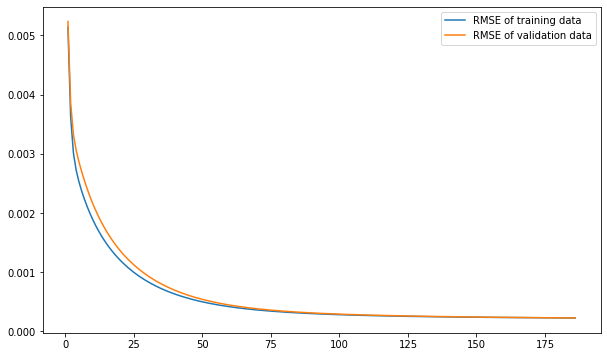

In [ ]:
#when BS = 2^12
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**12
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001

#Calling function and storing data
rmse_train_BS212, rmse_val_BS212, time_BS212, epoch_BS212 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)


The Total number of epochs is:  133
The final weight is:  [[-8.75686718e-04  1.78376138e-04 -7.49102421e-06 -1.29673845e-04
   4.92374556e-04  2.40935924e-04 -6.10622557e-05  4.47442626e-04
   3.28966261e-04  6.87759710e-05  2.00220342e-04 -4.34706233e-04
   2.12633399e-04  3.17911181e-04  2.71513775e-04  3.37175185e-04
  -2.71506259e-04 -2.33272961e-04 -9.78579332e-05 -2.73123295e-04
   3.43158647e-04  3.29661418e-04 -4.71890466e-04 -2.36982313e-04
   3.78355430e-04  4.12260224e-05  3.73439601e-05 -1.56081272e-06
  -6.81562519e-06 -3.64889711e-05  7.74235681e-06 -2.30357786e-05
  -2.78673631e-06  8.93353398e-06  3.88871206e-05 -3.71142766e-05
  -2.10176028e-05 -2.13628554e-06  1.61597324e-05 -8.83282558e-05
  -4.40614323e-04]]
The final RMSE of training is:  0.00021812737299275914
The final RMSE of testing is:  0.00022569377899505272


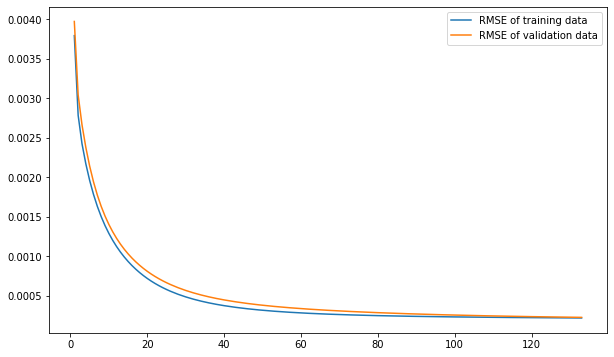

In [ ]:
#when BS = 2^11
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**11
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS211, rmse_val_BS211, time_BS211, epoch_BS211 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  69
The final weight is:  [[-8.74403535e-04  1.76222316e-04 -9.32060901e-06 -1.31408542e-04
   5.08809105e-04  2.37607557e-04 -5.28414888e-05  4.52425997e-04
   3.39185957e-04  7.60630550e-05  2.06680198e-04 -4.35761336e-04
   2.12833798e-04  3.18116274e-04  2.71780262e-04  3.37446634e-04
  -2.70985679e-04 -2.32750276e-04 -9.77872768e-05 -2.73055704e-04
   3.44442415e-04  3.30989476e-04 -4.70600281e-04 -2.35708157e-04
   3.79725827e-04  3.89374766e-05  3.39456190e-05 -7.25671933e-07
  -6.10415403e-06 -3.62421279e-05  8.22022771e-06 -2.08735652e-05
  -3.87438541e-06  6.49910979e-06  3.60452548e-05 -3.68844833e-05
  -2.00470644e-05 -2.68306159e-06  1.47321265e-05 -9.70860218e-05
  -4.39205314e-04]]
The final RMSE of training is:  0.00022072665848886947
The final RMSE of testing is:  0.00022557598562249136


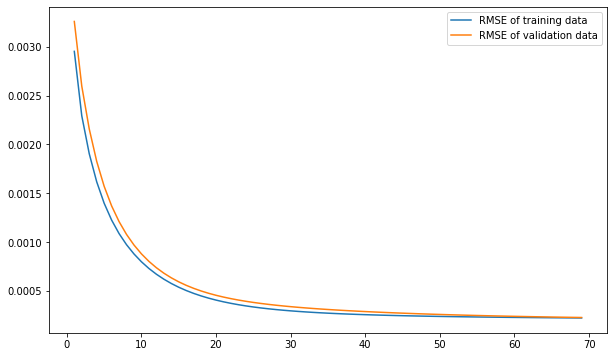

In [ ]:
#when BS = 2^10
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**10
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS210, rmse_val_BS210, time_BS210, epoch_BS210 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  34
The final weight is:  [[-8.74603384e-04  1.77443843e-04 -9.32434419e-06 -1.31535234e-04
   5.15252154e-04  2.37036505e-04 -4.85438184e-05  4.53254398e-04
   3.46354728e-04  7.92281483e-05  2.09063078e-04 -4.36580568e-04
   2.12985775e-04  3.18270777e-04  2.71790524e-04  3.37454483e-04
  -2.70975834e-04 -2.32735279e-04 -9.78561510e-05 -2.73131093e-04
   3.44765086e-04  3.31329882e-04 -4.70267099e-04 -2.35393724e-04
   3.80156968e-04  3.71997805e-05  3.21170668e-05 -9.12894340e-07
  -5.76166648e-06 -3.65889854e-05  7.87123349e-06 -2.19846750e-05
  -4.28126369e-06  4.56964714e-06  3.54824374e-05 -3.67412984e-05
  -2.24620175e-05 -4.82828285e-06  1.53473820e-05 -1.03146186e-04
  -4.38705172e-04]]
The final RMSE of training is:  0.00022222884130029312
The final RMSE of testing is:  0.0002256481130401279


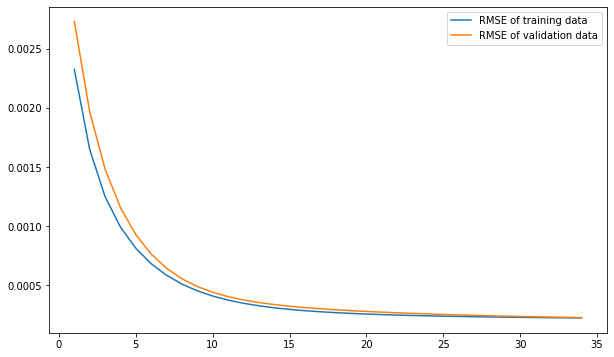

In [ ]:
#when BS = 2^9
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**9
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS209, rmse_val_BS209, time_BS209, epoch_BS209 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  17
The final weight is:  [[-8.73650236e-04  1.76833005e-04 -1.02039530e-05 -1.32713715e-04
   5.20344321e-04  2.36737839e-04 -4.49823230e-05  4.55554883e-04
   3.47656161e-04  8.36175165e-05  2.11464853e-04 -4.36560431e-04
   2.13134203e-04  3.18425497e-04  2.71997331e-04  3.37650266e-04
  -2.70793757e-04 -2.32545183e-04 -9.78283689e-05 -2.73114346e-04
   3.45251080e-04  3.31851000e-04 -4.70007536e-04 -2.35176710e-04
   3.80533293e-04  3.75786347e-05  2.75585701e-05 -5.40754949e-07
  -4.92421201e-06 -3.62491219e-05  7.74543140e-06 -2.00508753e-05
  -5.36671418e-06  4.17630660e-06  3.30173335e-05 -3.66528014e-05
  -1.99580003e-05 -3.84106512e-06  1.33529869e-05 -1.04279088e-04
  -4.38274352e-04]]
The final RMSE of training is:  0.00022296897442206713
The final RMSE of testing is:  0.00022346587905567458


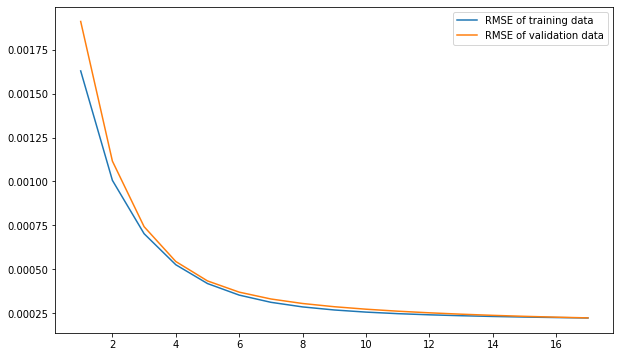

In [ ]:
#when BS = 2^8
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**8
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS208, rmse_val_BS208, time_BS208, epoch_BS208 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  8
The final weight is:  [[-8.72797754e-04  1.76874267e-04 -1.04526886e-05 -1.34282160e-04
   5.29098489e-04  2.36961929e-04 -3.82221865e-05  4.59349324e-04
   3.52797232e-04  9.19809260e-05  2.15930760e-04 -4.36095687e-04
   2.13587044e-04  3.18887342e-04  2.72459609e-04  3.38092091e-04
  -2.70638264e-04 -2.32381445e-04 -9.77893869e-05 -2.73088542e-04
   3.45492715e-04  3.32138712e-04 -4.70132418e-04 -2.35387136e-04
   3.80706065e-04  3.89227484e-05  2.10412337e-05 -5.86119811e-07
  -3.68751384e-06 -3.55261178e-05  8.26292107e-06 -1.99141839e-05
  -7.05816842e-06  3.39928093e-06  3.05273619e-05 -3.69398359e-05
  -1.73895303e-05 -3.43082339e-06  1.14942368e-05 -1.07219501e-04
  -4.37958103e-04]]
The final RMSE of training is:  0.00022501685673822155
The final RMSE of testing is:  0.000222299985044412


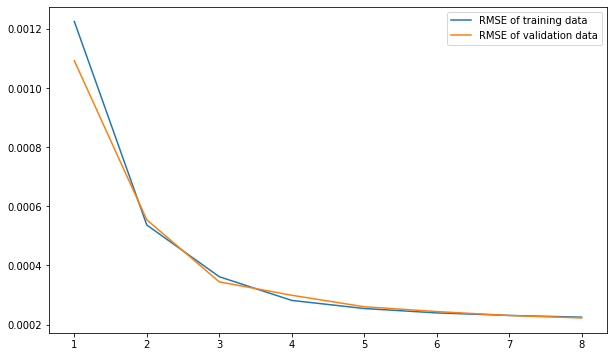

In [ ]:
#when BS = 2^7
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**7
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS207, rmse_val_BS207, time_BS207, epoch_BS207 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  27
The final weight is:  [[-8.73564348e-04  2.08706732e-04  2.09278211e-06 -1.30765425e-04
   1.74147010e-04  2.65837764e-04 -8.78701552e-05  3.08082138e-04
   9.14759728e-05  3.30927945e-05  6.69683932e-05 -4.35526783e-04
   1.91105714e-04  2.96501837e-04  2.48530958e-04  3.14338121e-04
  -2.77055557e-04 -2.38671217e-04 -1.00788848e-04 -2.76214396e-04
   3.33574291e-04  3.19905138e-04 -4.63748686e-04 -2.29354246e-04
   3.78990819e-04  2.82227621e-05 -4.89496303e-05 -1.80013752e-06
  -2.37062832e-05 -3.36470271e-05 -1.69757957e-05 -1.62393957e-05
   1.05466005e-06  7.70517904e-06  5.63788265e-05 -2.86842198e-05
  -1.34266689e-05  1.13466560e-05 -1.76554200e-05  2.50200771e-05
  -4.39388449e-04]]
The final RMSE of training is:  0.00021090923346952738
The final RMSE of testing is:  0.00021243204634432467


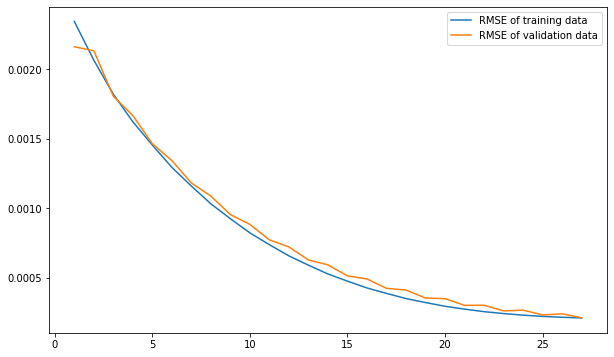

In [ ]:
#when BS = 2^6
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**6
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS206, rmse_val_BS206, time_BS206, epoch_BS206 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  234
The final weight is:  [[-8.71196967e-04  1.70372017e-04 -8.01642540e-06 -1.34722184e-04
   5.32138367e-04  2.28433078e-04 -3.65550227e-05  4.67625216e-04
   3.54675022e-04  1.00482421e-04  2.19655990e-04 -4.35260888e-04
   2.14157437e-04  3.19424422e-04  2.73932892e-04  3.39731599e-04
  -2.69382847e-04 -2.31145929e-04 -9.50465607e-05 -2.70420524e-04
   3.47623709e-04  3.33118047e-04 -4.68610067e-04 -2.34406198e-04
   3.80956613e-04  4.21520948e-05  4.52066338e-05 -2.50216684e-06
  -4.00961673e-05 -3.54412332e-05 -1.45741691e-05 -1.93628063e-05
   5.93624092e-05  2.32072255e-06  5.94196272e-05 -3.83003929e-05
  -1.86009095e-05 -6.16559173e-06  3.13867289e-06 -1.13601359e-04
  -4.39098842e-04]]
The final RMSE of training is:  0.00023809129676956818
The final RMSE of testing is:  0.000226065227858842


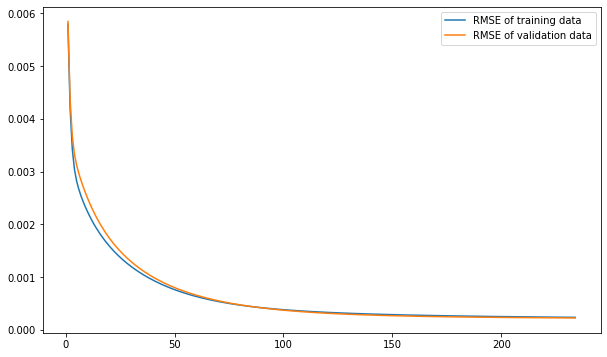

In [ ]:
#when BS = 2^13
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 2**13
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS213, rmse_val_BS213, time_BS213, epoch_BS213 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  42
The final weight is:  [[-8.74301758e-04  1.76693496e-04 -1.03445479e-05 -1.31258943e-04
   5.14271029e-04  2.36737694e-04 -5.10011579e-05  4.52914297e-04
   3.43834834e-04  7.73538164e-05  2.08001542e-04 -4.36520214e-04
   2.12614306e-04  3.17899178e-04  2.71532868e-04  3.37201420e-04
  -2.71155924e-04 -2.32916681e-04 -9.79671662e-05 -2.73240512e-04
   3.44461087e-04  3.31029538e-04 -4.70110275e-04 -2.35234305e-04
   3.80148841e-04  3.69151684e-05  3.22027771e-05 -5.91470099e-07
  -5.81022830e-06 -3.64803663e-05  7.94318246e-06 -2.10286202e-05
  -4.12773339e-06  5.59589757e-06  3.50742547e-05 -3.71395469e-05
  -2.21595823e-05 -4.06690296e-06  1.52084892e-05 -9.85573031e-05
  -4.38721237e-04]]
The final RMSE of training is:  0.00022155375341481723
The final RMSE of testing is:  0.00022481927999459155


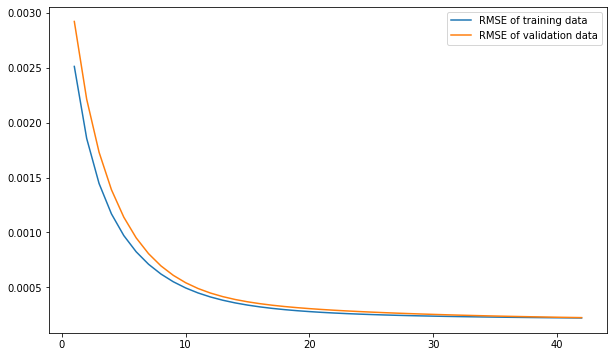

In [ ]:
#when BS = 5^4
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 5**4
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS504, rmse_val_BS504, time_BS504, epoch_BS504 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  49
The final weight is:  [[-8.73790965e-04  1.73998770e-04 -1.07420027e-05 -1.32653992e-04
   5.16617462e-04  2.34406497e-04 -5.04883588e-05  4.52995353e-04
   3.46343137e-04  7.41134558e-05  2.11073388e-04 -4.33461731e-04
   2.14347315e-04  3.19631650e-04  2.72773513e-04  3.38440725e-04
  -2.70638042e-04 -2.32400045e-04 -9.59428143e-05 -2.71213274e-04
   3.45149519e-04  3.31716683e-04 -4.71465667e-04 -2.36586059e-04
   3.77703566e-04  3.67973510e-05  3.26318312e-05  7.03219887e-07
  -5.68287991e-06 -3.45545880e-05  7.83682381e-06 -2.82746480e-05
  -4.06260465e-06  2.88583999e-06  3.51236015e-05 -3.80348767e-05
  -2.23426359e-05 -3.30468632e-06  1.55443391e-05 -1.01757444e-04
  -4.41168252e-04]]
The final RMSE of training is:  0.00022232794830906436
The final RMSE of testing is:  0.00022598795765926743


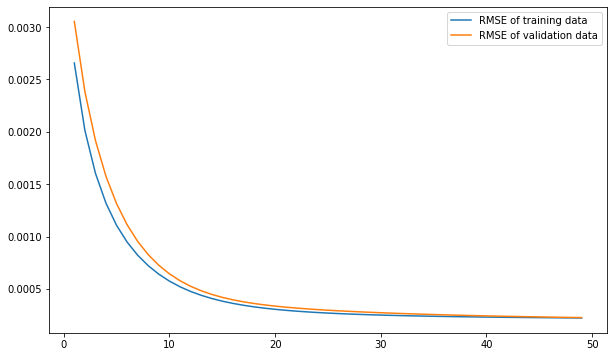

In [ ]:
#when BS = 3^6
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 3**6
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS306, rmse_val_BS306, time_BS306, epoch_BS306 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  11
The final weight is:  [[-8.73192148e-04  1.90008314e-04 -6.09759024e-06 -1.29394529e-04
   4.11089725e-04  2.50802097e-04 -8.33620416e-05  4.08842219e-04
   2.71493302e-04  4.04885637e-05  1.66852146e-04 -4.37929748e-04
   2.06987384e-04  3.12310647e-04  2.65279527e-04  3.31059386e-04
  -2.73958900e-04 -2.35444927e-04 -1.00144810e-04 -2.75511689e-04
   3.41294907e-04  3.28255487e-04 -4.70188991e-04 -2.35675674e-04
   3.79403960e-04  3.35109023e-05  4.23911859e-06 -1.39930269e-07
  -5.59700709e-05 -3.45610639e-05 -5.06796926e-05 -1.87885018e-05
  -2.61327430e-05  7.06615314e-06  3.10307002e-07 -3.34205992e-05
  -5.89987492e-07  1.91796878e-06 -1.46185127e-06 -5.12108656e-05
  -4.39058625e-04]]
The final RMSE of training is:  0.00023132289570787997
The final RMSE of testing is:  0.0002056027791003943


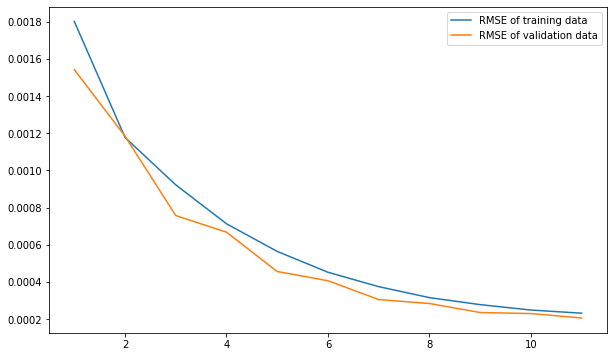

In [ ]:
#when BS = 3^4
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 3**4
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS304, rmse_val_BS304, time_BS304, epoch_BS304 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  778
The final weight is:  [[-8.73267652e-04  1.74920294e-04 -1.07212741e-05 -1.32726909e-04
   5.18471051e-04  2.35001167e-04 -4.75159800e-05  4.54631929e-04
   3.44754113e-04  7.98039786e-05  2.10537138e-04 -4.37058640e-04
   2.12244390e-04  3.17528703e-04  2.71366208e-04  3.37040912e-04
  -2.70919773e-04 -2.32687570e-04 -9.80404372e-05 -2.73303150e-04
   3.45130765e-04  3.31743445e-04 -4.69778766e-04 -2.34880356e-04
   3.80482995e-04  3.65106587e-05  3.25999302e-05 -2.06207368e-07
  -5.70270599e-06 -3.59426765e-05  8.49190444e-06 -1.87430644e-05
  -4.14412564e-06  4.46473634e-06  3.34258158e-05 -3.66529017e-05
  -2.11814619e-05 -2.88769107e-06  1.46462511e-05 -1.02064772e-04
  -4.38402437e-04]]
The final RMSE of training is:  0.00022237588279356085
The final RMSE of testing is:  0.0002262181589084657


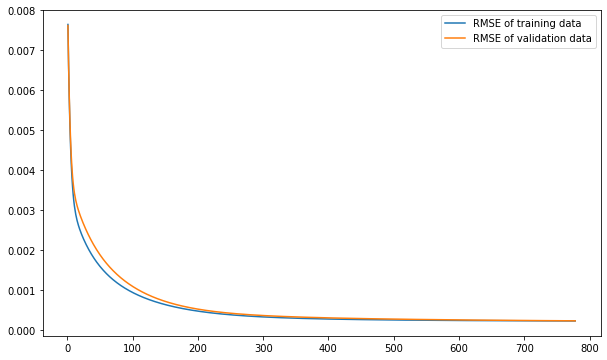

In [ ]:
#when BS = 1
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = x_train.shape[0]
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_BS001, rmse_val_BS001, time_BS001, epoch_BS001 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

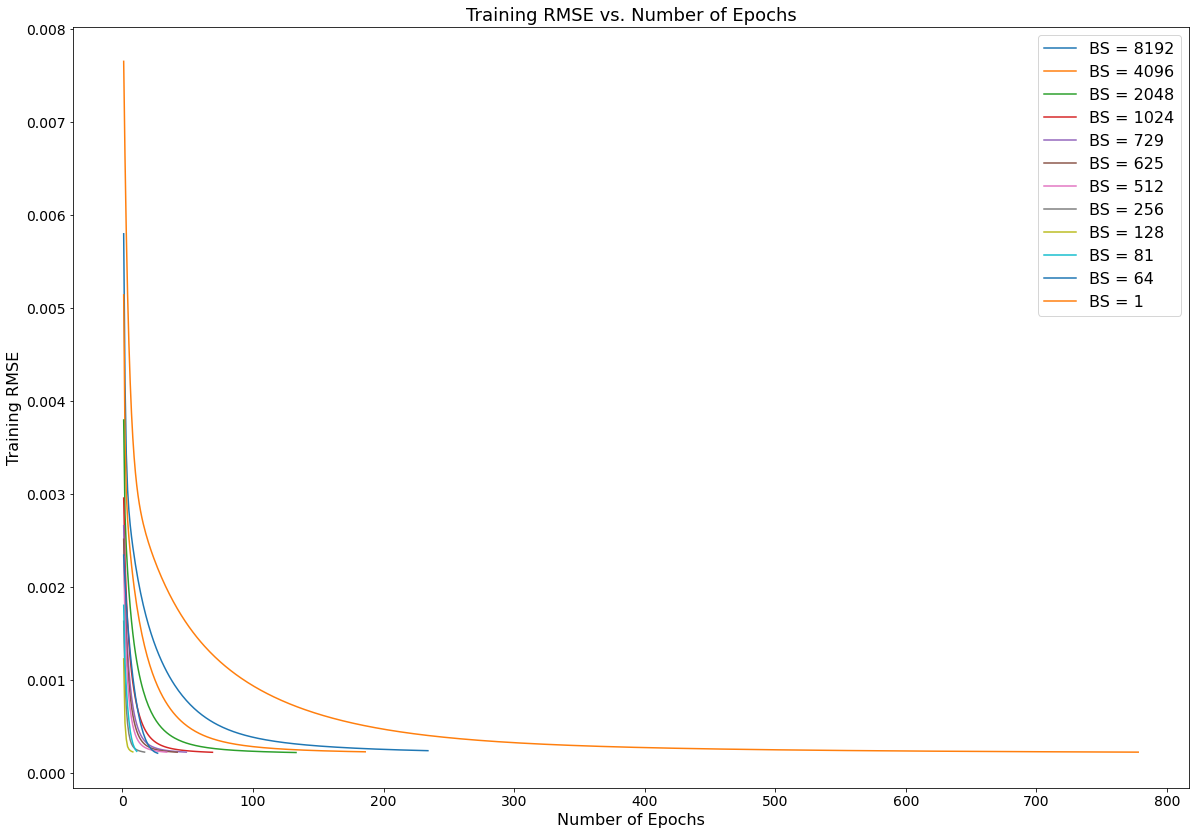

In [ ]:
#Plotting training RMSE vs epochs 


plt.figure(figsize=(20, 14))

plt.plot(epoch_BS213, rmse_train_BS213, label = 'BS = 8192')
plt.plot(epoch_BS212, rmse_train_BS212, label = 'BS = 4096')
plt.plot(epoch_BS211, rmse_train_BS211, label = 'BS = 2048')
plt.plot(epoch_BS210, rmse_train_BS210, label = 'BS = 1024')
plt.plot(epoch_BS306, rmse_train_BS306, label = 'BS = 729')
plt.plot(epoch_BS504, rmse_train_BS504, label = 'BS = 625')
plt.plot(epoch_BS209, rmse_train_BS209, label = 'BS = 512')
plt.plot(epoch_BS208, rmse_train_BS208, label = 'BS = 256')
plt.plot(epoch_BS207, rmse_train_BS207, label = 'BS = 128')
plt.plot(epoch_BS304, rmse_train_BS304, label = 'BS = 81')
plt.plot(epoch_BS206, rmse_train_BS206, label = 'BS = 64')
plt.plot(epoch_BS001, rmse_train_BS001, label = 'BS = 1')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Training RMSE vs. Number of Epochs', size=18)
plt.xlabel('Number of Epochs', size=16)
plt.ylabel('Training RMSE', size=16)
plt.show()

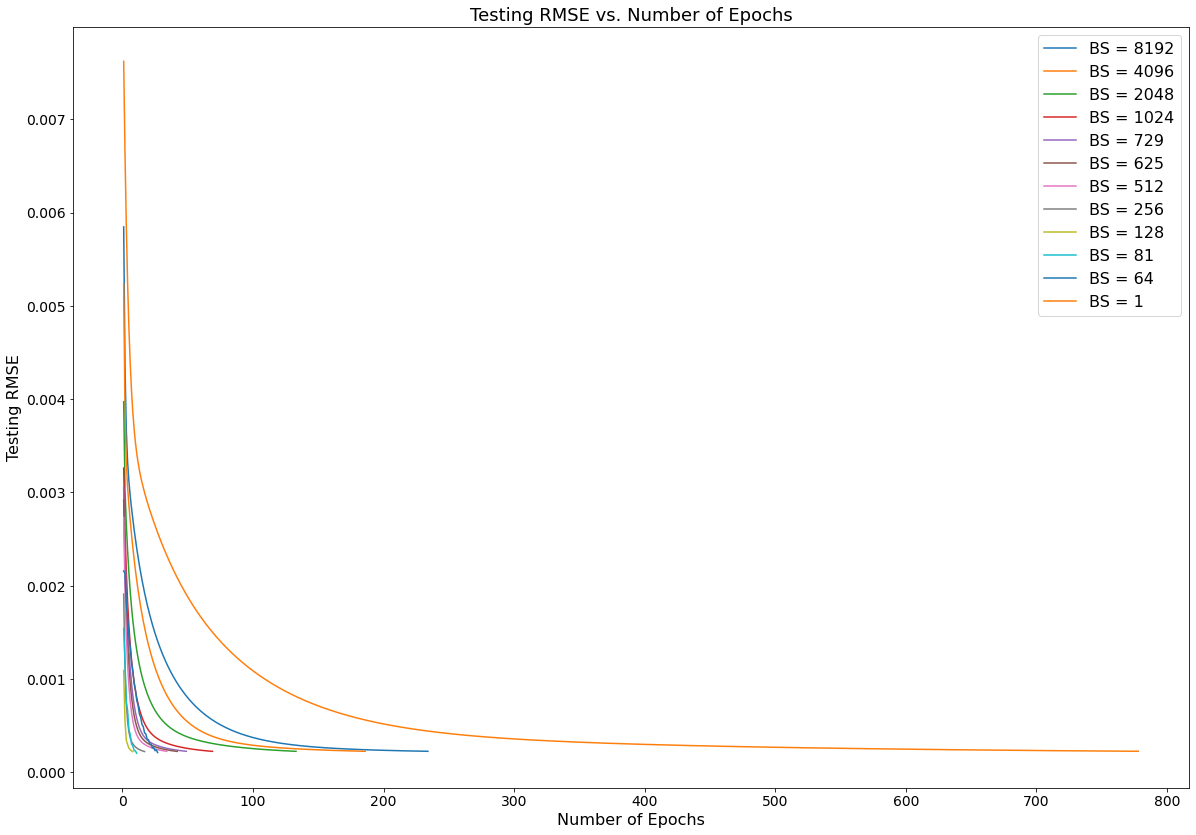

In [ ]:
#Plotting testing RMSE vs epochs 

plt.figure(figsize=(20, 14))

plt.plot(epoch_BS213, rmse_val_BS213, label = 'BS = 8192')
plt.plot(epoch_BS212, rmse_val_BS212, label = 'BS = 4096')
plt.plot(epoch_BS211, rmse_val_BS211, label = 'BS = 2048')
plt.plot(epoch_BS210, rmse_val_BS210, label = 'BS = 1024')
plt.plot(epoch_BS306, rmse_val_BS306, label = 'BS = 729')
plt.plot(epoch_BS504, rmse_val_BS504, label = 'BS = 625')
plt.plot(epoch_BS209, rmse_val_BS209, label = 'BS = 512')
plt.plot(epoch_BS208, rmse_val_BS208, label = 'BS = 256')
plt.plot(epoch_BS207, rmse_val_BS207, label = 'BS = 128')
plt.plot(epoch_BS304, rmse_val_BS304, label = 'BS = 81')
plt.plot(epoch_BS206, rmse_val_BS206, label = 'BS = 64')
plt.plot(epoch_BS001, rmse_val_BS001, label = 'BS = 1')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Testing RMSE vs. Number of Epochs', size=18)
plt.xlabel('Number of Epochs', size=16)
plt.ylabel('Testing RMSE', size=16)
plt.show()

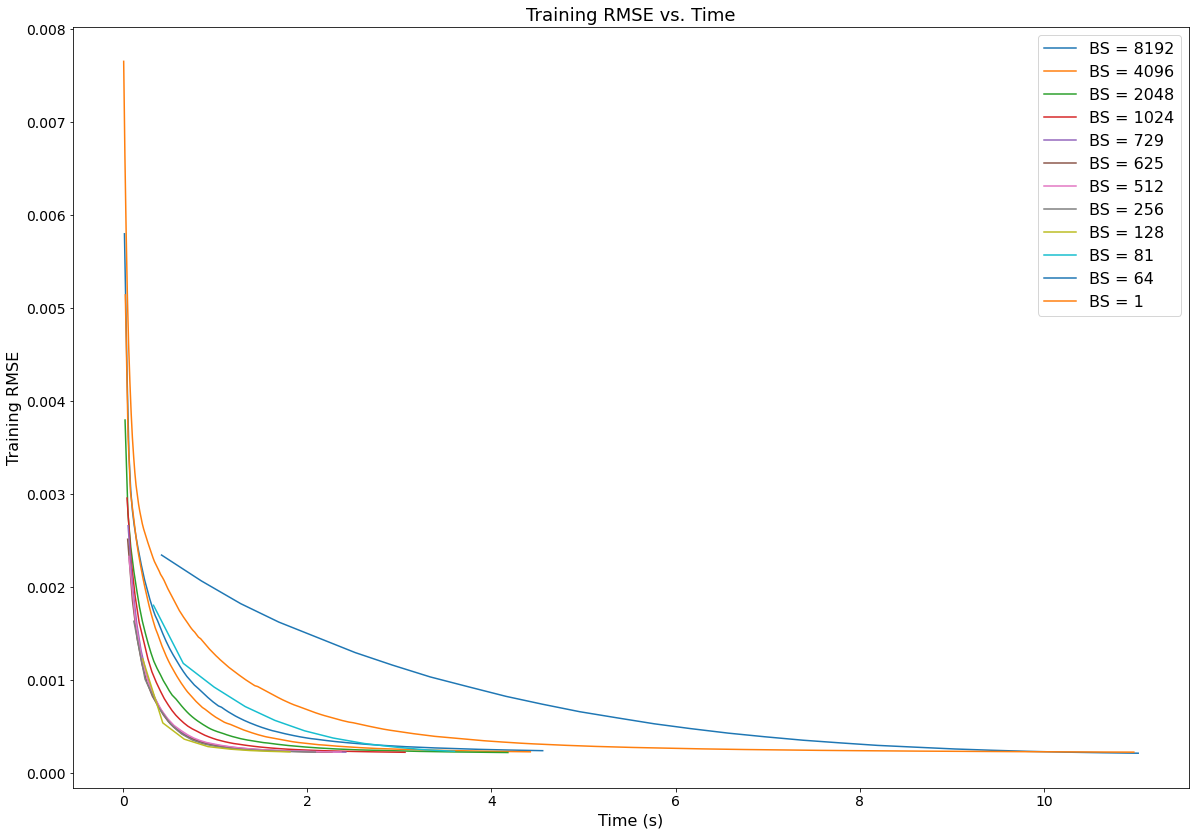

In [ ]:
#Plotting training RMSE vs time 


plt.figure(figsize=(20, 14))

plt.plot(time_BS213, rmse_train_BS213, label = 'BS = 8192')
plt.plot(time_BS212, rmse_train_BS212, label = 'BS = 4096')
plt.plot(time_BS211, rmse_train_BS211, label = 'BS = 2048')
plt.plot(time_BS210, rmse_train_BS210, label = 'BS = 1024')
plt.plot(time_BS306, rmse_train_BS306, label = 'BS = 729')
plt.plot(time_BS504, rmse_train_BS504, label = 'BS = 625')
plt.plot(time_BS209, rmse_train_BS209, label = 'BS = 512')
plt.plot(time_BS208, rmse_train_BS208, label = 'BS = 256')
plt.plot(time_BS207, rmse_train_BS207, label = 'BS = 128')
plt.plot(time_BS304, rmse_train_BS304, label = 'BS = 81')
plt.plot(time_BS206, rmse_train_BS206, label = 'BS = 64')
plt.plot(time_BS001, rmse_train_BS001, label = 'BS = 1')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Training RMSE vs. Time', size=18)
plt.xlabel('Time (s)', size=16)
plt.ylabel('Training RMSE', size=16)
plt.show()

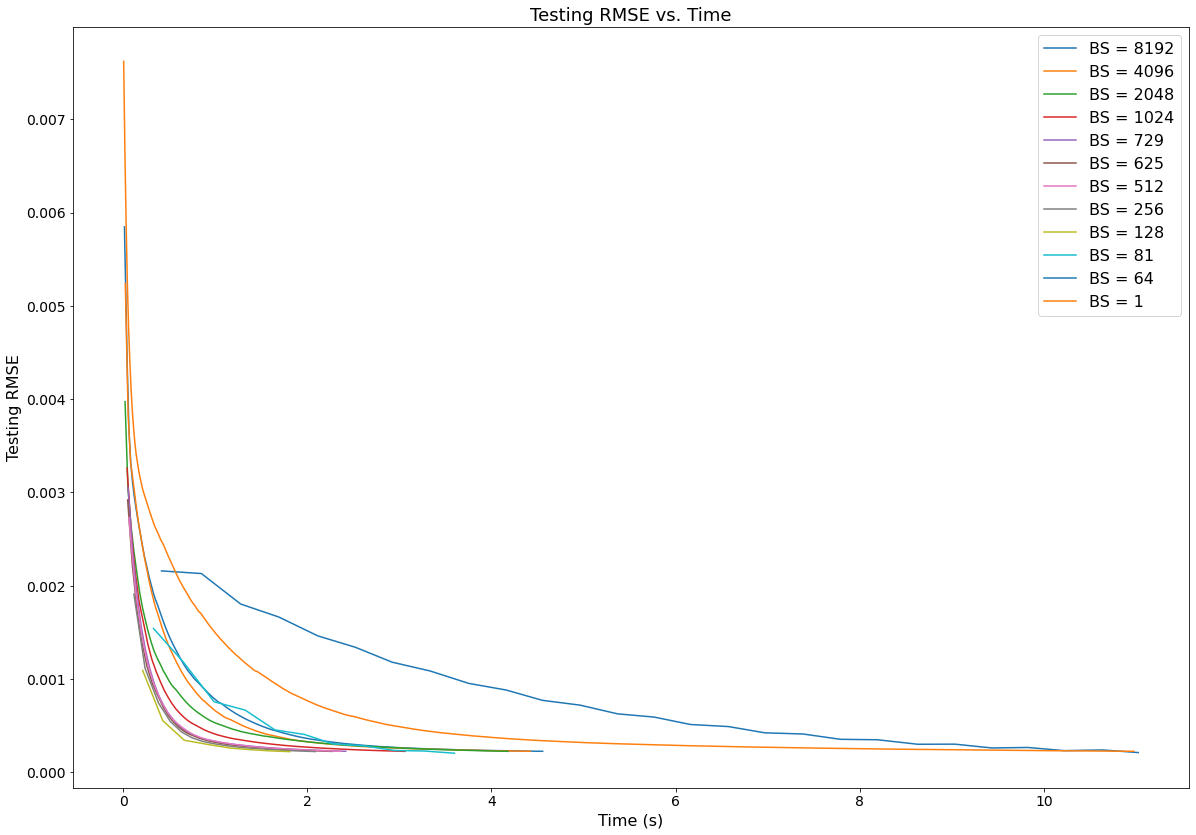

In [ ]:
#Plotting testing RMSE vs time 


plt.figure(figsize=(20, 14))

plt.plot(time_BS213, rmse_val_BS213, label = 'BS = 8192')
plt.plot(time_BS212, rmse_val_BS212, label = 'BS = 4096')
plt.plot(time_BS211, rmse_val_BS211, label = 'BS = 2048')
plt.plot(time_BS210, rmse_val_BS210, label = 'BS = 1024')
plt.plot(time_BS306, rmse_val_BS306, label = 'BS = 729')
plt.plot(time_BS504, rmse_val_BS504, label = 'BS = 625')
plt.plot(time_BS209, rmse_val_BS209, label = 'BS = 512')
plt.plot(time_BS208, rmse_val_BS208, label = 'BS = 256')
plt.plot(time_BS207, rmse_val_BS207, label = 'BS = 128')
plt.plot(time_BS304, rmse_val_BS304, label = 'BS = 81')
plt.plot(time_BS206, rmse_val_BS206, label = 'BS = 64')
plt.plot(time_BS001, rmse_val_BS001, label = 'BS = 1')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Testing RMSE vs. Time', size=18)
plt.xlabel('Time (s)', size=16)
plt.ylabel('Testing RMSE', size=16)
plt.show()

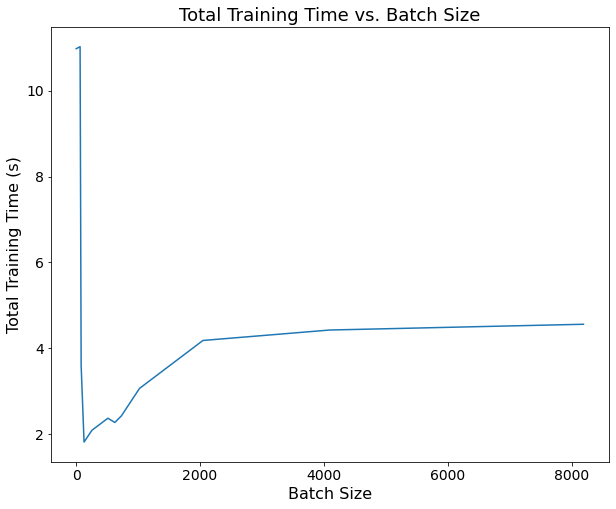

The minimum total training time is:  1.8132328987121582 s
The corresponding batch size is:  128


In [ ]:
#Plotting total training time vs batch size

total_time =np.array([time_BS213[-1], time_BS212[-1], time_BS211[-1], time_BS210[-1], 
                      time_BS306[-1], time_BS504[-1], time_BS209[-1], time_BS208[-1], time_BS207[-1], time_BS304[-1],
                      time_BS206[-1], time_BS001[-1]])

batch_size =np.array([8192, 4096, 2048, 1024, 729, 625, 512, 256, 128, 81, 64, 1])

plt.figure(figsize=(10, 8))
plt.plot(batch_size, total_time)
plt.tick_params(labelsize=14)
plt.title('Total Training Time vs. Batch Size', size=18)
plt.xlabel('Batch Size', size=16)
plt.ylabel('Total Training Time (s)', size=16)
plt.show()

print("The minimum total training time is: ", min(total_time), "s")
print("The corresponding batch size is: ", batch_size[total_time.argmin()])


**Describe your findings, including the main takeawyas from each of your plots. [1]**

*From all the individual RMSE plots and the last five summary plots, it is observed that:*

*1) The model is overfitting when the batch size is greater than 2^7 which is 128. The model switches from overfitting to underfitting when batch size is equal to 2^7. The model becomes underfitting when batch size is smaller than 2^7.*

*2) The fastest batch size is 2^7 which is 128. When the batch size is smaller than 2^7, the total time taken to converge becomes much longer. When the batch size exceeds 2^7, the total convergence time begins to increase. As the batch size continues to increase (>2^10), the total time taken to converge continues to increase as well and starts to become a concern.*

*3) The batch size 2^7 also results in the smallest number of epochs. Batch sizes smaller than 2^7 and bigger than 2^7 result in a greater number of epochs.*

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

Select the best batch size based on the fastest convergence time and sweep the learning rate (at least 10 values) while applying Mini-batch GD. 

**1. Plot the training and validation RMSE vs Epoch (x-axis) for all the learning rates that you tried in a figure. [0.5]**

**2. Plot the training and validation RMSE vs Time (x-axis) for all the learning rates that you tried in a figure. [0.5]**



The Total number of epochs is:  112
The final weight is:  [[-8.73280854e-04  1.75133023e-04 -1.03958887e-05 -1.32794709e-04
   5.18464012e-04  2.35175588e-04 -4.72998090e-05  4.54602525e-04
   3.45219755e-04  8.02335326e-05  2.10659745e-04 -4.36670875e-04
   2.12557418e-04  3.17842625e-04  2.71593743e-04  3.37266674e-04
  -2.70899885e-04 -2.32665049e-04 -9.79466425e-05 -2.73213268e-04
   3.45038685e-04  3.31640856e-04 -4.69769165e-04 -2.34879389e-04
   3.80598884e-04  3.65848724e-05  3.19592582e-05 -2.38906837e-07
  -5.67347208e-06 -3.58255539e-05  8.34696199e-06 -1.95263405e-05
  -4.25581870e-06  4.55681995e-06  3.35201312e-05 -3.69576298e-05
  -2.11202905e-05 -2.95795250e-06  1.45780355e-05 -1.02098411e-04
  -4.38280531e-04]]
The final RMSE of training is:  0.0002224271128279272
The final RMSE of testing is:  0.0002256996606127887


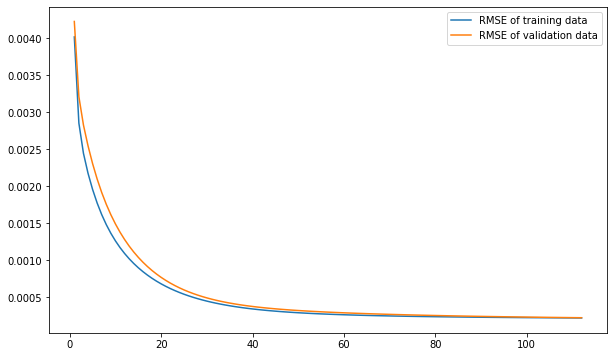

In [ ]:
# When lr = 0.0008

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.0008
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr1, rmse_val_lr1, time_lr1, epoch_lr1 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  902
The final weight is:  [[-8.73300789e-04  1.75071301e-04 -1.04061211e-05 -1.32719527e-04
   5.18003922e-04  2.35112119e-04 -4.78356151e-05  4.54400445e-04
   3.44906418e-04  7.95178299e-05  2.10450550e-04 -4.36797813e-04
   2.12365852e-04  3.17650002e-04  2.71435788e-04  3.37109380e-04
  -2.71002115e-04 -2.32769575e-04 -9.80444796e-05 -2.73307664e-04
   3.44941229e-04  3.31548056e-04 -4.69821913e-04 -2.34924976e-04
   3.80497611e-04  3.64743499e-05  3.27204688e-05 -2.38180333e-07
  -5.74208387e-06 -3.58093602e-05  8.41031750e-06 -1.94911090e-05
  -4.06119119e-06  4.61398293e-06  3.36426149e-05 -3.69362066e-05
  -2.13603660e-05 -2.91464426e-06  1.47945418e-05 -1.01848763e-04
  -4.38388064e-04]]
The final RMSE of training is:  0.000222318826228552
The final RMSE of testing is:  0.0002262182548001014


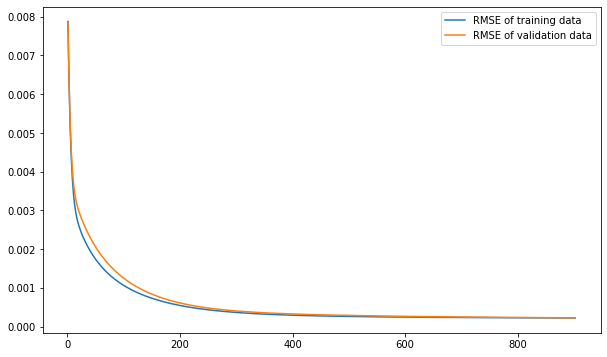

In [ ]:
# When lr = 0.0001
x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.0001
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr2, rmse_val_lr2, time_lr2, epoch_lr2 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  89
The final weight is:  [[-8.73254893e-04  1.75103082e-04 -1.04045086e-05 -1.32872934e-04
   5.19216351e-04  2.35133141e-04 -4.67104891e-05  4.54904865e-04
   3.45703272e-04  8.09105429e-05  2.10982624e-04 -4.36624655e-04
   2.12644727e-04  3.17929843e-04  2.71674331e-04  3.37347090e-04
  -2.70853180e-04 -2.32617753e-04 -9.79048377e-05 -2.73172529e-04
   3.45091569e-04  3.31688835e-04 -4.69752537e-04 -2.34863486e-04
   3.80634090e-04  3.66555721e-05  3.20268600e-05 -2.60023045e-07
  -5.71214003e-06 -3.58308524e-05  8.33894369e-06 -1.95412303e-05
  -4.27386088e-06  4.48601511e-06  3.38173810e-05 -3.69774767e-05
  -2.13170820e-05 -2.99659411e-06  1.47255329e-05 -1.02468671e-04
  -4.38243734e-04]]
The final RMSE of training is:  0.00022264464584440926
The final RMSE of testing is:  0.00022589423104798595


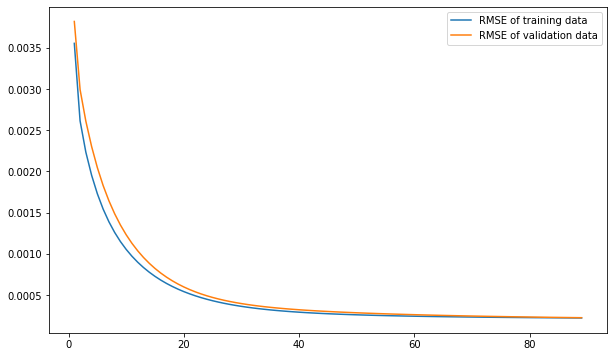

In [ ]:
# When lr = 0.001

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.001
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr3, rmse_val_lr3, time_lr3, epoch_lr3 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  17
The final weight is:  [[-8.73082028e-04  1.76032701e-04 -1.04165351e-05 -1.33403329e-04
   5.23008950e-04  2.36152772e-04 -4.32467523e-05  4.56575233e-04
   3.48381895e-04  8.54700769e-05  2.12804501e-04 -4.36230745e-04
   2.13368719e-04  3.18660025e-04  2.72265376e-04  3.37922672e-04
  -2.70616998e-04 -2.32369206e-04 -9.76622248e-05 -2.72947598e-04
   3.45458628e-04  3.32059223e-04 -4.69709336e-04 -2.34876952e-04
   3.80876239e-04  3.75214067e-05  2.75555260e-05 -3.59039535e-07
  -5.03272199e-06 -3.57843684e-05  7.95731166e-06 -1.96942593e-05
  -5.46933551e-06  4.08620205e-06  3.30722642e-05 -3.69916748e-05
  -1.99923273e-05 -3.22275260e-06  1.35061654e-05 -1.04465036e-04
  -4.37931582e-04]]
The final RMSE of training is:  0.00022359505383580145
The final RMSE of testing is:  0.00022379719961587512


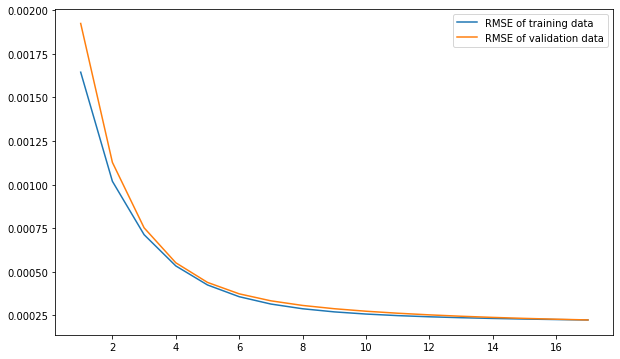

In [ ]:
# When lr = 0.005

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.005
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr4, rmse_val_lr4, time_lr4, epoch_lr4 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  179
The final weight is:  [[-8.73273192e-04  1.75049094e-04 -1.04103474e-05 -1.32810257e-04
   5.18790759e-04  2.35075330e-04 -4.71627401e-05  4.54724203e-04
   3.45417251e-04  8.03245711e-05  2.10790562e-04 -4.36713329e-04
   2.12503710e-04  3.17788131e-04  2.71557455e-04  3.37231031e-04
  -2.70924512e-04 -2.32690787e-04 -9.79733591e-05 -2.73238482e-04
   3.45019457e-04  3.31620328e-04 -4.69789444e-04 -2.34895098e-04
   3.80563897e-04  3.65672397e-05  3.25276125e-05 -2.53634761e-07
  -5.76016604e-06 -3.58217806e-05  8.38760951e-06 -1.95157713e-05
  -4.13723523e-06  4.53689658e-06  3.38490802e-05 -3.69618191e-05
  -2.14460406e-05 -2.96211873e-06  1.48493878e-05 -1.02233831e-04
  -4.38318532e-04]]
The final RMSE of training is:  0.00022253420953488205
The final RMSE of testing is:  0.00022620464269436624


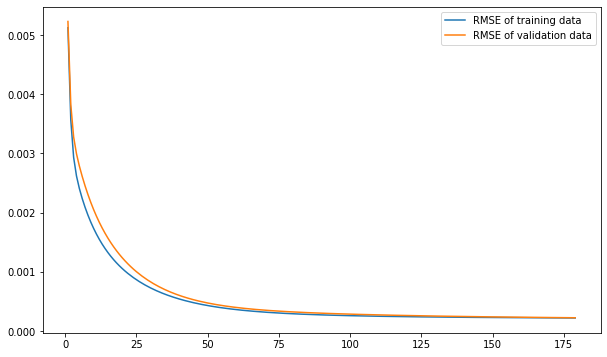

In [ ]:
# When lr = 0.0005

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.0005
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr5, rmse_val_lr5, time_lr5, epoch_lr5 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  10
The final weight is:  [[-8.72739839e-04  1.76337831e-04 -1.04338836e-05 -1.34199179e-04
   5.29524456e-04  2.36369483e-04 -3.78380565e-05  4.59292689e-04
   3.52806445e-04  9.19224870e-05  2.15915198e-04 -4.36078004e-04
   2.13687711e-04  3.18982671e-04  2.72578429e-04  3.38222744e-04
  -2.70533297e-04 -2.32279516e-04 -9.76423357e-05 -2.72935865e-04
   3.45636332e-04  3.32240388e-04 -4.69925594e-04 -2.35135647e-04
   3.80836237e-04  3.86097700e-05  2.49137128e-05 -6.77953598e-07
  -4.54863464e-06 -3.55822501e-05  7.97017372e-06 -1.98110200e-05
  -6.47329560e-06  3.32480285e-06  3.36085455e-05 -3.69915910e-05
  -1.97893549e-05 -3.45059013e-06  1.33353895e-05 -1.07505932e-04
  -4.37891719e-04]]
The final RMSE of training is:  0.00022538779477000856
The final RMSE of testing is:  0.00022424353439279065


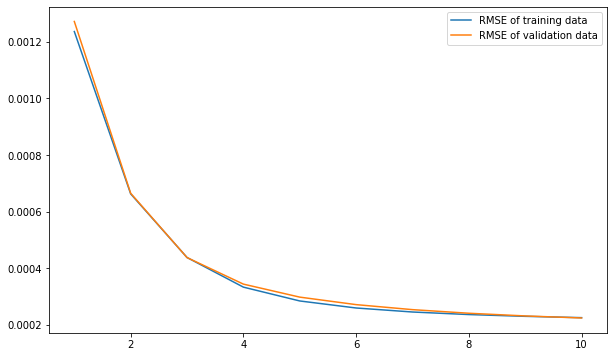

In [ ]:
# When lr = 0.008

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.008
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr6, rmse_val_lr6, time_lr6, epoch_lr6 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  27
The final weight is:  [[-8.73730487e-04  2.08673404e-04  2.37552508e-06 -1.31564475e-04
   1.75481051e-04  2.65602221e-04 -8.69938520e-05  3.08821924e-04
   9.20662246e-05  3.42968467e-05  6.75586025e-05 -4.34872014e-04
   1.91218438e-04  2.96612578e-04  2.48654487e-04  3.14470768e-04
  -2.76764639e-04 -2.38376900e-04 -1.00481834e-04 -2.75905211e-04
   3.33866549e-04  3.20199629e-04 -4.63060688e-04 -2.28673317e-04
   3.79816360e-04  2.87323489e-05 -4.75090173e-05 -1.94311834e-06
  -2.49333448e-05 -3.35027742e-05 -1.80151743e-05 -1.60074735e-05
   4.24932331e-07  8.05826461e-06  5.52600973e-05 -2.92280384e-05
  -1.31699458e-05  1.21939078e-05 -1.72534971e-05  2.49947912e-05
  -4.38574566e-04]]
The final RMSE of training is:  0.0002104803480375425
The final RMSE of testing is:  0.00021190946156122834


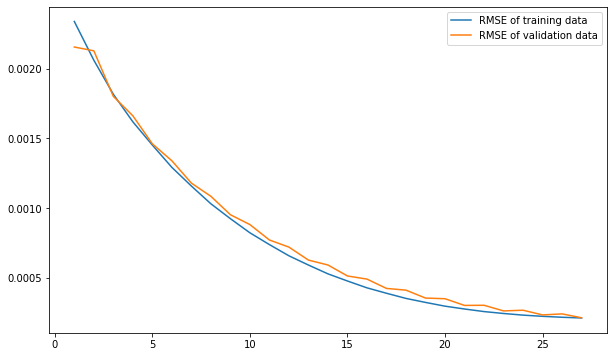

In [ ]:
# When lr = 0.02

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.02
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr7, rmse_val_lr7, time_lr7, epoch_lr7 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  35
The final weight is:  [[-8.73195921e-04  1.75406795e-04 -1.03956609e-05 -1.33059223e-04
   5.20511615e-04  2.35475903e-04 -4.54132888e-05  4.55457785e-04
   3.46595203e-04  8.26077073e-05  2.11585506e-04 -4.36415364e-04
   2.13011354e-04  3.18298650e-04  2.71974045e-04  3.37641699e-04
  -2.70702667e-04 -2.32461975e-04 -9.77531065e-05 -2.73028586e-04
   3.45276597e-04  3.31868847e-04 -4.69676349e-04 -2.34806536e-04
   3.80791309e-04  3.69488837e-05  3.04539899e-05 -2.91588189e-07
  -5.49657840e-06 -3.58347078e-05  8.16791486e-06 -1.96079686e-05
  -4.70442313e-06  4.33687003e-06  3.36594805e-05 -3.70016506e-05
  -2.08949931e-05 -3.09080408e-06  1.43137642e-05 -1.03206813e-04
  -4.38067696e-04]]
The final RMSE of training is:  0.00022298875778438204
The final RMSE of testing is:  0.00022502157515791302


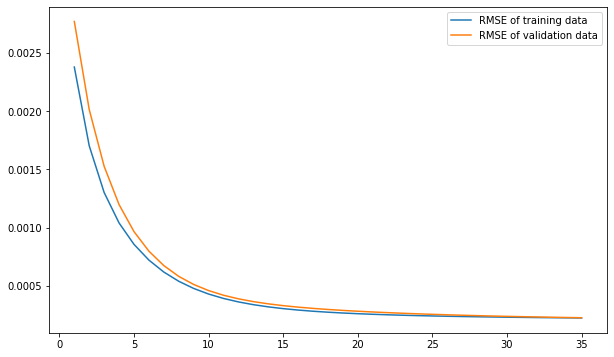

In [ ]:
# When lr = 0.0025

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.0025
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr8, rmse_val_lr8, time_lr8, epoch_lr8 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  9
The final weight is:  [[-8.73302508e-04  1.85638625e-04 -7.87267179e-06 -1.30439218e-04
   4.55068662e-04  2.46261138e-04 -7.58587125e-05  4.28130077e-04
   3.03729225e-04  5.03016806e-05  1.85303706e-04 -4.37643972e-04
   2.09182766e-04  3.14505653e-04  2.67705587e-04  3.33479149e-04
  -2.73019770e-04 -2.34519268e-04 -9.96159889e-05 -2.74970115e-04
   3.42519862e-04  3.29454723e-04 -4.70518637e-04 -2.35971736e-04
   3.79741293e-04  3.48994142e-05  4.56230644e-06  3.47819083e-07
  -5.41596248e-05 -3.49281113e-05 -4.77788161e-05 -1.92105029e-05
  -2.72248546e-05  7.11218753e-06  3.80059158e-06 -3.50117296e-05
  -1.86739672e-06  1.41474568e-07 -6.06639435e-07 -7.15877179e-05
  -4.38739550e-04]]
The final RMSE of training is:  0.00023512710470241567
The final RMSE of testing is:  0.0002103173626487244


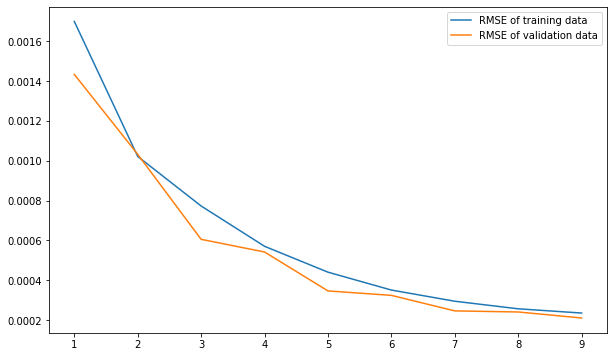

In [ ]:
# When lr = 0.015

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.015
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr9, rmse_val_lr9, time_lr9, epoch_lr9 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  1805
The final weight is:  [[-8.73302521e-04  1.75070472e-04 -1.04066092e-05 -1.32713078e-04
   5.17959251e-04  2.35112207e-04 -4.78820781e-05  4.54381056e-04
   3.44876596e-04  7.94577625e-05  2.10430769e-04 -4.36807481e-04
   2.12351652e-04  3.17635734e-04  2.71423789e-04  3.37097375e-04
  -2.71010292e-04 -2.32777901e-04 -9.80521488e-05 -2.73315104e-04
   3.44933660e-04  3.31540916e-04 -4.69825756e-04 -2.34928391e-04
   3.80489907e-04  3.64661342e-05  3.27697934e-05 -2.38085959e-07
  -5.74475370e-06 -3.58078519e-05  8.41392151e-06 -1.94884828e-05
  -4.04830376e-06  4.61889477e-06  3.36457956e-05 -3.69342020e-05
  -2.13729355e-05 -2.91100540e-06  1.48059819e-05 -1.01827060e-04
  -4.38396204e-04]]
The final RMSE of training is:  0.0002223081935467652
The final RMSE of testing is:  0.00022625018414961916


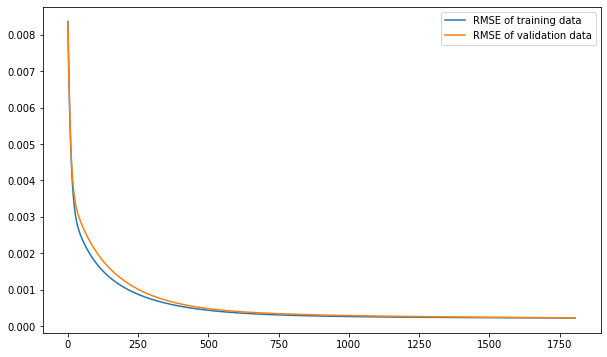

In [ ]:
# When lr = 0.00005

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.00005
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr10, rmse_val_lr10, time_lr10, epoch_lr10 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

The Total number of epochs is:  8
The final weight is:  [[-8.72797754e-04  1.76874267e-04 -1.04526886e-05 -1.34282160e-04
   5.29098489e-04  2.36961929e-04 -3.82221865e-05  4.59349324e-04
   3.52797232e-04  9.19809260e-05  2.15930760e-04 -4.36095687e-04
   2.13587044e-04  3.18887342e-04  2.72459609e-04  3.38092091e-04
  -2.70638264e-04 -2.32381445e-04 -9.77893869e-05 -2.73088542e-04
   3.45492715e-04  3.32138712e-04 -4.70132418e-04 -2.35387136e-04
   3.80706065e-04  3.89227484e-05  2.10412337e-05 -5.86119811e-07
  -3.68751384e-06 -3.55261178e-05  8.26292107e-06 -1.99141839e-05
  -7.05816842e-06  3.39928093e-06  3.05273619e-05 -3.69398359e-05
  -1.73895303e-05 -3.43082339e-06  1.14942368e-05 -1.07219501e-04
  -4.37958103e-04]]
The final RMSE of training is:  0.00022501685673822155
The final RMSE of testing is:  0.000222299985044412


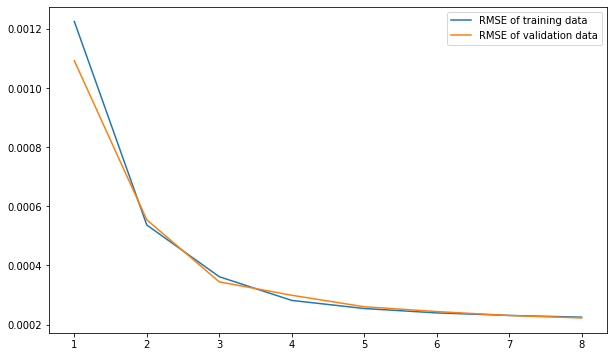

In [ ]:
# When lr = 0.01

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = 0.01
CT = rmse(y_test_predict, y_test)*1.001


#Calling function and storing data
rmse_train_lr11, rmse_val_lr11, time_lr11, epoch_lr11 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

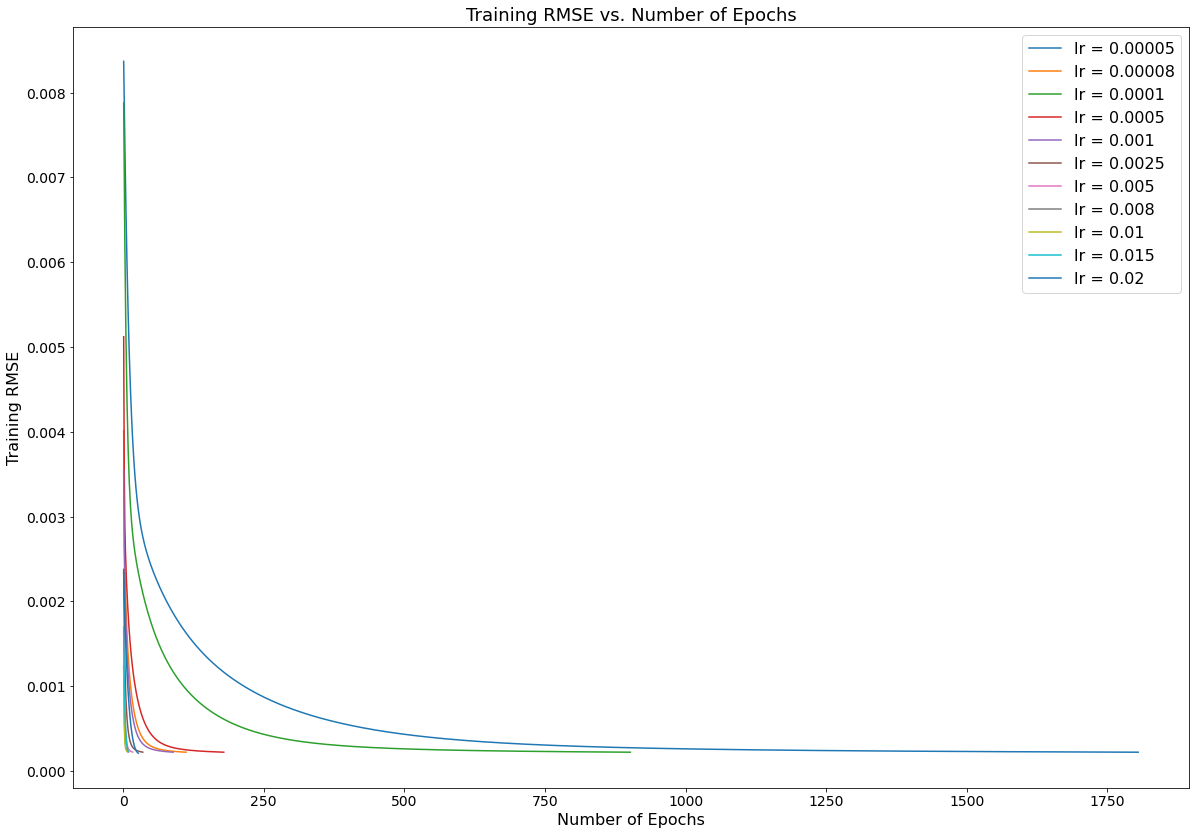

In [ ]:
#Plotting training RMSE vs epochs 

plt.figure(figsize=(20, 14))

plt.plot(epoch_lr10, rmse_train_lr10, label = 'lr = 0.00005')
plt.plot(epoch_lr1, rmse_train_lr1, label = 'lr = 0.00008')
plt.plot(epoch_lr2, rmse_train_lr2, label = 'lr = 0.0001')
plt.plot(epoch_lr5, rmse_train_lr5, label = 'lr = 0.0005')
plt.plot(epoch_lr3, rmse_train_lr3, label = 'lr = 0.001')
plt.plot(epoch_lr8, rmse_train_lr8, label = 'lr = 0.0025')
plt.plot(epoch_lr4, rmse_train_lr4, label = 'lr = 0.005')
plt.plot(epoch_lr6, rmse_train_lr6, label = 'lr = 0.008')
plt.plot(epoch_lr11, rmse_train_lr11, label = 'lr = 0.01')
plt.plot(epoch_lr9, rmse_train_lr9, label = 'lr = 0.015')
plt.plot(epoch_lr7, rmse_train_lr7, label = 'lr = 0.02')


plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Training RMSE vs. Number of Epochs', size=18)
plt.xlabel('Number of Epochs', size=16)
plt.ylabel('Training RMSE', size=16)
plt.show()

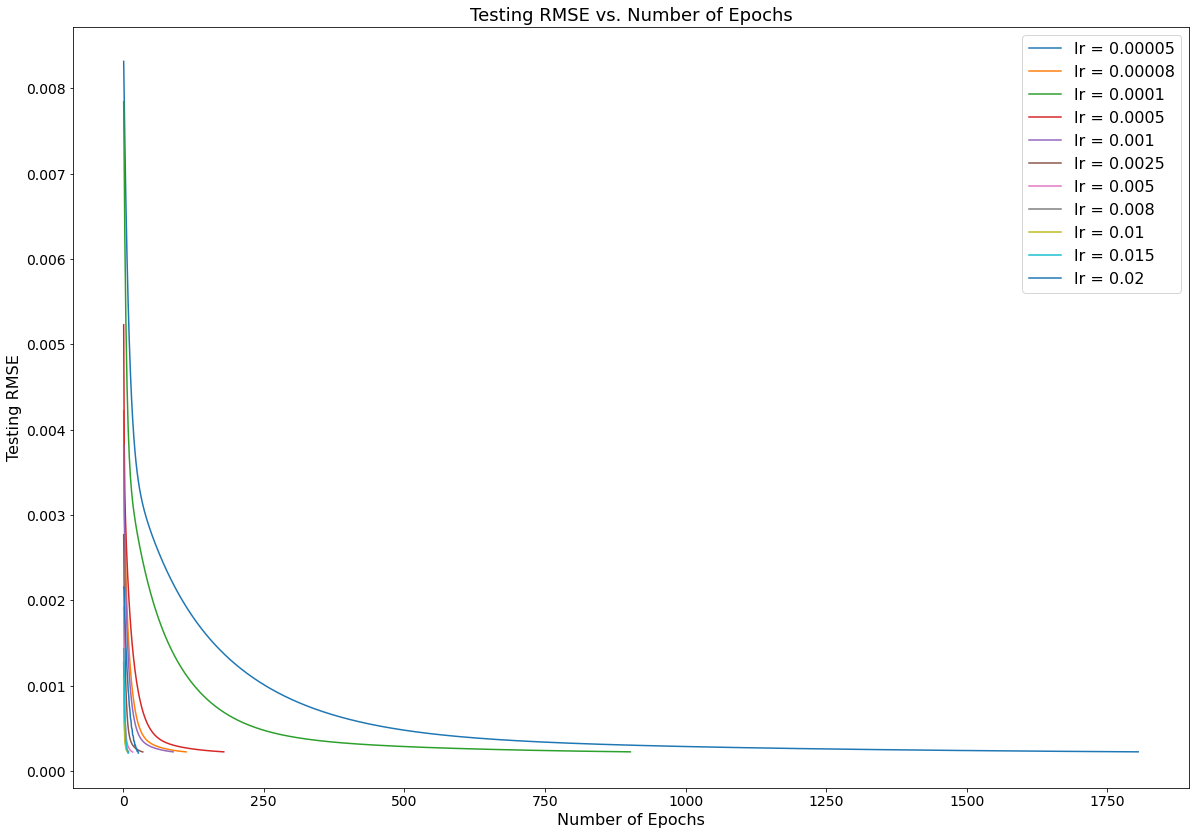

In [ ]:
#Plotting testing RMSE vs epochs 

plt.figure(figsize=(20, 14))

plt.plot(epoch_lr10, rmse_val_lr10, label = 'lr = 0.00005')
plt.plot(epoch_lr1, rmse_val_lr1, label = 'lr = 0.00008')
plt.plot(epoch_lr2, rmse_val_lr2, label = 'lr = 0.0001')
plt.plot(epoch_lr5, rmse_val_lr5, label = 'lr = 0.0005')
plt.plot(epoch_lr3, rmse_val_lr3, label = 'lr = 0.001')
plt.plot(epoch_lr8, rmse_val_lr8, label = 'lr = 0.0025')
plt.plot(epoch_lr4, rmse_val_lr4, label = 'lr = 0.005')
plt.plot(epoch_lr6, rmse_val_lr6, label = 'lr = 0.008')
plt.plot(epoch_lr11, rmse_val_lr11, label = 'lr = 0.01')
plt.plot(epoch_lr9, rmse_val_lr9, label = 'lr = 0.015')
plt.plot(epoch_lr7, rmse_val_lr7, label = 'lr = 0.02')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Testing RMSE vs. Number of Epochs', size=18)
plt.xlabel('Number of Epochs', size=16)
plt.ylabel('Testing RMSE', size=16)
plt.show()

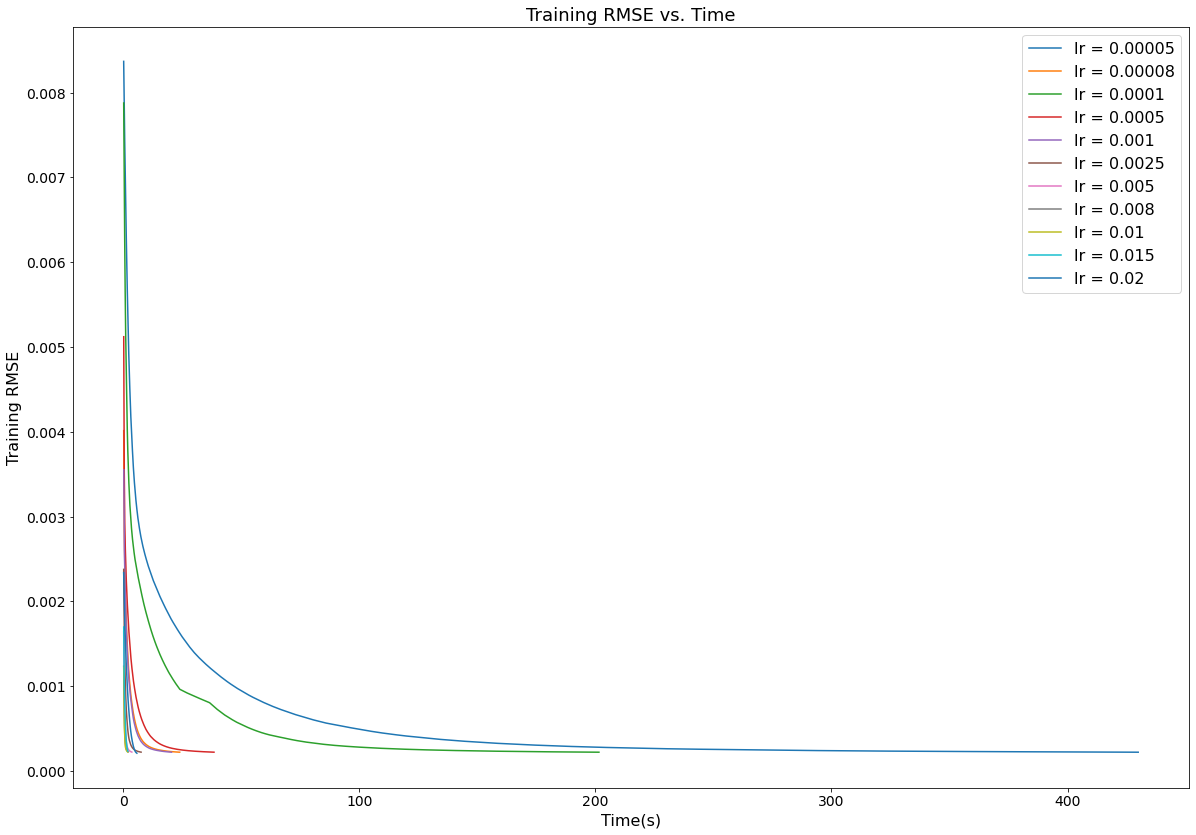

In [ ]:
#Plotting training RMSE vs time

plt.figure(figsize=(20, 14))

plt.plot(time_lr10, rmse_train_lr10, label = 'lr = 0.00005')
plt.plot(time_lr1, rmse_train_lr1, label = 'lr = 0.00008')
plt.plot(time_lr2, rmse_train_lr2, label = 'lr = 0.0001')
plt.plot(time_lr5, rmse_train_lr5, label = 'lr = 0.0005')
plt.plot(time_lr3, rmse_train_lr3, label = 'lr = 0.001')
plt.plot(time_lr8, rmse_train_lr8, label = 'lr = 0.0025')
plt.plot(time_lr4, rmse_train_lr4, label = 'lr = 0.005')
plt.plot(time_lr6, rmse_train_lr6, label = 'lr = 0.008')
plt.plot(time_lr11, rmse_train_lr11, label = 'lr = 0.01')
plt.plot(time_lr9, rmse_train_lr9, label = 'lr = 0.015')
plt.plot(time_lr7, rmse_train_lr7, label = 'lr = 0.02')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Training RMSE vs. Time', size=18)
plt.xlabel('Time(s)', size=16)
plt.ylabel('Training RMSE', size=16)
plt.show()

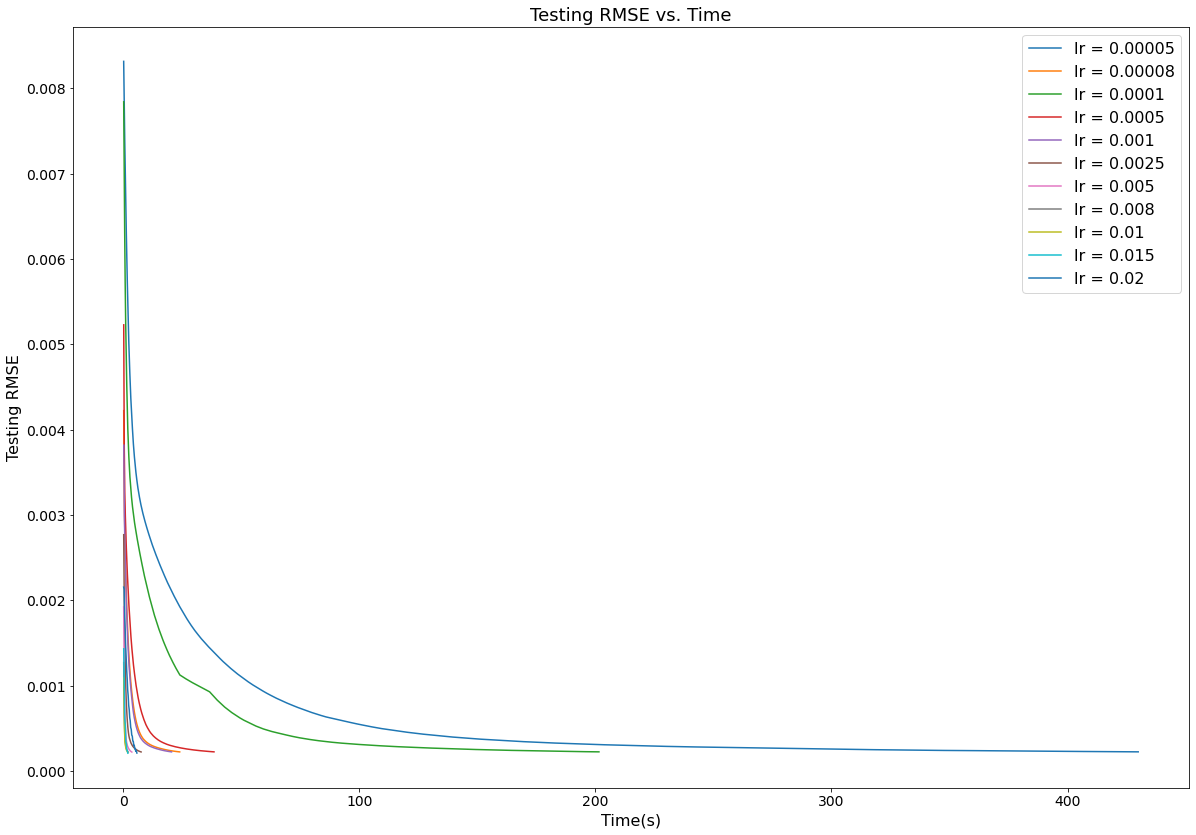

In [ ]:
#Plotting testing RMSE vs time

plt.figure(figsize=(20, 14))

plt.plot(time_lr10, rmse_val_lr10, label = 'lr = 0.00005')
plt.plot(time_lr1, rmse_val_lr1, label = 'lr = 0.00008')
plt.plot(time_lr2, rmse_val_lr2, label = 'lr = 0.0001')
plt.plot(time_lr5, rmse_val_lr5, label = 'lr = 0.0005')
plt.plot(time_lr3, rmse_val_lr3, label = 'lr = 0.001')
plt.plot(time_lr8, rmse_val_lr8, label = 'lr = 0.0025')
plt.plot(time_lr4, rmse_val_lr4, label = 'lr = 0.005')
plt.plot(time_lr6, rmse_val_lr6, label = 'lr = 0.008')
plt.plot(time_lr11, rmse_val_lr11, label = 'lr = 0.01')
plt.plot(time_lr9, rmse_val_lr9, label = 'lr = 0.015')
plt.plot(time_lr7, rmse_val_lr7, label = 'lr = 0.02')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('Testing RMSE vs. Time', size=18)
plt.xlabel('Time(s)', size=16)
plt.ylabel('Testing RMSE', size=16)
plt.show()

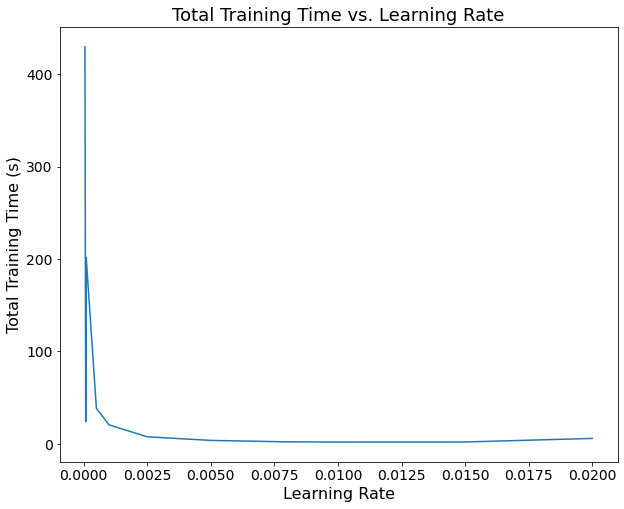

The minimum training time is:  1.8973579406738281 s
The corresponding learning rate is:  0.01


In [ ]:
total_time_lr = np.array([time_lr10[-1], time_lr1[-1], time_lr2[-1], time_lr5[-1], 
                      time_lr3[-1], time_lr8[-1], time_lr4[-1], time_lr6[-1], time_lr11[-1], time_lr9[-1], time_lr7[-1]])

learning_rate = np.array([0.00005, 0.00008, 0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.008, 0.01, 0.015, 0.02])

plt.figure(figsize=(10, 8))
plt.plot(learning_rate, total_time_lr)
plt.tick_params(labelsize=14)
plt.title('Total Training Time vs. Learning Rate', size=18)
plt.xlabel('Learning Rate', size=16)
plt.ylabel('Total Training Time (s)', size=16)
plt.show()

#results_lr = np.column_stack(learning_rate, total_time_lr)
print("The minimum training time is: ", min(total_time_lr), "s")
print("The corresponding learning rate is: ", learning_rate[total_time_lr.argmin()])


**3. Describe your findings, including the main takeawyas from each of your plots. [1]**

*From all the individual plots and the last five summary plots, it is observed that:*

*1) Learning rates that are smaller than 0.01 result in overfitting of the model. Learning rates that are greater than 0.01 result in underfitting of the model. When the learning rate is equal to 0.01, the model starts off being underfitting and then switches to being overfitting.*

*2) Learning rates that are too small (< 0.0025) result in a greater number of epochs and hence longer total convergence time. Learning rates ranging from 0.005 to 0.015 result in a plateau of convergence time. When the learning rate exceeds 0.015, the convergence time shows an increasing trend.*

## Part 6 - Gradient Descent with Adaptive Learning Rate [4 marks]
Implement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. It's up to you to come up with a way to set **when** and **how much** do you want to change the learning rate. 
Our goal is to find a method for faster convergence. 

  **1. Describe [1] and implement [1] your method.**

*3 methods have been implemented here.*

*Method 1 - Step Decay: reduce the learning rate to 90% of its original value every 4 epochs. A step decay function is defined, which uses the number of epoch, a set size of reduction (every 4 epochs) and a set value of learning rate reduction (0.9) to update the learning rate.*

*Method 2 - Exponential Decay Based on RMSE (every epoch): exponentially decrease the learning rate every epoch based on the ratio between RMSE and CT. The ratio between RMSE and CT is calculated after every epoch. The ratio, multiplied by the decay parameter m (set to 0.001 so the learning rate won't decrease too much each time), is then used to exponentially decrease the learning rate after every epoch. As the RMSE becomes smaller overtime, the learning rate decreases by a smaller amount.*

*Method 3 - Exponential Decay Based on RMSE (every iteration): exponentially decrease the learning rate every iteration based on the ratio between RMSE and CT. The ratio between RMSE and CT is calculated after every iteration. The ratio, multiplied by the decay parameter m (set to 0.00001 so the learning rate won't decrease too much each time), is then used to exponentially decrease the learning rate after every iteration. As the RMSE becomes smaller overtime, the learning rate decreases by a smaller amount.*

In [ ]:
import math

def step_decay(epoch, lr):
  epochs_drop = 4
  drop = 0.9
  return lr*math.pow(drop, math.floor(epoch/epochs_drop))

In [ ]:
def Func_P6_stepdecay(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000):

  #Initializing
  W_final = []
  rmse_train = []
  rmse_val = []
  epoch = []
  time_int = []
  j = 0
  k = 0

  y_val_pred_P4 = np.dot(x_test, W_func.T)
  RMSE = rmse(y_val_pred_P4, Y_test)

  #Initializing timer
  start_time = time.time()

  #Iterations
  while (RMSE > CT):
    if (x_train.shape[0]%BS == 0):
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
         
    else:
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
    
      n_batches = int(x_train.shape[0]/BS)
      last_batch = x_train.shape[0]-n_batches*BS
      x_train_i = x_train[-last_batch:]
      Y_train_i = Y_train[-last_batch:]
      Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
      Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
      gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
      W_func = W_func - lr * gradient
      k = k+1
    
    j=j+1 
    epoch.append(j) #count how many epochs we have
    W_final.append(W_func) #output final weight for each epoch
    time_int.append(time.time()-start_time) #update time for each epoch

    Y_train_pred_final = np.dot(x_train, W_func.T).reshape(-1,1) #calculating training rmse using the W at the end of the epoch
    Y_val_pred_final = np.dot(x_test, W_func.T).reshape(-1,1) #calculating testing rmse using the W at the end of the epoch
    
    rmse_train.append(rmse(Y_train_pred_final, Y_train)) #output training rmse for each epoch
    rmse_val.append(rmse(Y_val_pred_final, Y_test)) #output testing rmse for each epoch
    
    RMSE = rmse(Y_val_pred_final, Y_test) #update RMSE in the while argument
    lr = step_decay(j,lr)

    if k == max_it:
      break
  
  print("The Total number of epochs is: ", j)
  print("The final weight is: ", W_final[-1])
  print("The final RMSE of training is: ", rmse_train[-1])
  print("The final RMSE of testing is: ", rmse_val[-1])
  
  #Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(epoch, rmse_train, label = 'RMSE of training data')
  plt.plot(epoch, rmse_val, label = 'RMSE of validation data')
  plt.legend()
  plt.show()

  return rmse_train, rmse_val, time_int, epoch

In [ ]:
def Func_P6_expodecay1(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, m, max_it=20000):

  #Initializing
  W_final = []
  rmse_train = []
  rmse_val = []
  epoch = []
  time_int = []
  j = 0
  k = 0

  y_val_pred_P4 = np.dot(x_test, W_func.T)
  RMSE = rmse(y_val_pred_P4, Y_test)

  #Initializing timer
  start_time = time.time()

  #Iterations
  while (RMSE > CT):
    if (x_train.shape[0]%BS == 0):
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
        
         
    else:
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
    
      n_batches = int(x_train.shape[0]/BS)
      last_batch = x_train.shape[0]-n_batches*BS
      x_train_i = x_train[-last_batch:]
      Y_train_i = Y_train[-last_batch:]
      Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
      Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
      gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
      W_func = W_func - lr * gradient
      k = k+1
    
    j=j+1 
    epoch.append(j) #count how many epochs we have
    W_final.append(W_func) #output final weight for each epoch
    time_int.append(time.time()-start_time) #update time for each epoch

    Y_train_pred_final = np.dot(x_train, W_func.T).reshape(-1,1) #calculating training rmse using the W at the end of the epoch
    Y_val_pred_final = np.dot(x_test, W_func.T).reshape(-1,1) #calculating testing rmse using the W at the end of the epoch
    
    rmse_train.append(rmse(Y_train_pred_final, Y_train)) #output training rmse for each epoch
    rmse_val.append(rmse(Y_val_pred_final, Y_test)) #output testing rmse for each epoch
    
    RMSE = rmse(Y_val_pred_final, Y_test) #update RMSE in the while argument
    rtio = RMSE/CT
    lr =  lr*math.exp(-m*rtio)

    if k == max_it:
      break
  
  print("The Total number of epochs is: ", j)
  print("The final weight is: ", W_final[-1])
  print("The final RMSE of training is: ", rmse_train[-1])
  print("The final RMSE of testing is: ", rmse_val[-1])
  
  #Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(epoch, rmse_train, label = 'RMSE of training data')
  plt.plot(epoch, rmse_val, label = 'RMSE of validation data')
  plt.legend()
  plt.show()

  return rmse_train, rmse_val, time_int, epoch

In [ ]:
def Func_P6_expodecay2(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, m, max_it=20000):

  #Initializing
  W_final = []
  rmse_train = []
  rmse_val = []
  epoch = []
  time_int = []
  j = 0
  k = 0

  y_val_pred_P4 = np.dot(x_test, W_func.T)
  RMSE = rmse(y_val_pred_P4, Y_test)

  #Initializing timer
  start_time = time.time()

  #Iterations
  while (RMSE > CT):
    if (x_train.shape[0]%BS == 0):
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
        RMSE = rmse(Y_val_pred, Y_test)
        rtio = RMSE/CT
        lr =  lr*math.exp(-m*rtio)
        
         
    else:
      for i in range (0, x_train.shape[0], BS):
        x_train_i = x_train[i:i+BS]
        Y_train_i = Y_train[i:i+BS]
        Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
        Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
        gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
        W_func = W_func - lr * gradient
        k = k+1
        RMSE = rmse(Y_val_pred, Y_test)
        rtio = RMSE/CT
        lr =  lr*math.exp(-m*rtio)
        
      n_batches = int(x_train.shape[0]/BS)
      last_batch = x_train.shape[0]-n_batches*BS
      x_train_i = x_train[-last_batch:]
      Y_train_i = Y_train[-last_batch:]
      Y_train_pred = np.dot(x_train_i, W_func.T).reshape(-1,1)
      Y_val_pred = np.dot(x_test, W_func.T).reshape(-1,1)
      gradient = (1/len(Y_train_i)) * np.dot(x_train_i.T, Y_train_pred - Y_train_i).reshape(1,-1)
      W_func = W_func - lr * gradient
      k = k+1
      RMSE = rmse(Y_val_pred, Y_test)
      rtio = RMSE/CT
      lr =  lr*math.exp(-m*rtio)
      
    
    j=j+1 
    epoch.append(j) #count how many epochs we have
    W_final.append(W_func) #output final weight for each epoch
    time_int.append(time.time()-start_time) #update time for each epoch

    Y_train_pred_final = np.dot(x_train, W_func.T).reshape(-1,1) #calculating training rmse using the W at the end of the epoch
    Y_val_pred_final = np.dot(x_test, W_func.T).reshape(-1,1) #calculating testing rmse using the W at the end of the epoch
    
    rmse_train.append(rmse(Y_train_pred_final, Y_train)) #output training rmse for each epoch
    rmse_val.append(rmse(Y_val_pred_final, Y_test)) #output testing rmse for each epoch
    
    RMSE = rmse(Y_val_pred_final, Y_test) #update RMSE in the while argument

    if k == max_it:
      break
  
  print("The Total number of epochs is: ", j)
  print("The final weight is: ", W_final[-1])
  print("The final RMSE of training is: ", rmse_train[-1])
  print("The final RMSE of testing is: ", rmse_val[-1])
  
  #Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(epoch, rmse_train, label = 'RMSE of training data')
  plt.plot(epoch, rmse_val, label = 'RMSE of validation data')
  plt.legend()
  plt.show()

  return rmse_train, rmse_val, time_int, epoch

The Total number of epochs is:  8
The final weight is:  [[-8.72538337e-04  1.76694082e-04 -1.04175516e-05 -1.34568074e-04
   5.32376069e-04  2.37053435e-04 -3.55380535e-05  4.60203589e-04
   3.54267460e-04  9.43214917e-05  2.17084090e-04 -4.35936698e-04
   2.13819195e-04  3.19115607e-04  2.72711533e-04  3.38338197e-04
  -2.70448633e-04 -2.32189636e-04 -9.76501376e-05 -2.72952587e-04
   3.45687618e-04  3.32325214e-04 -4.70091408e-04 -2.35358596e-04
   3.80815458e-04  3.90049033e-05  2.38628621e-05 -9.48742052e-07
  -3.54482522e-06 -3.54319360e-05  8.13910661e-06 -1.98534957e-05
  -7.13610664e-06  2.98936577e-06  3.10843120e-05 -3.68847604e-05
  -1.80836291e-05 -3.41795166e-06  1.19924790e-05 -1.08387993e-04
  -4.37817038e-04]]
The final RMSE of training is:  0.0002258950324858609
The final RMSE of testing is:  0.00022433776685892067


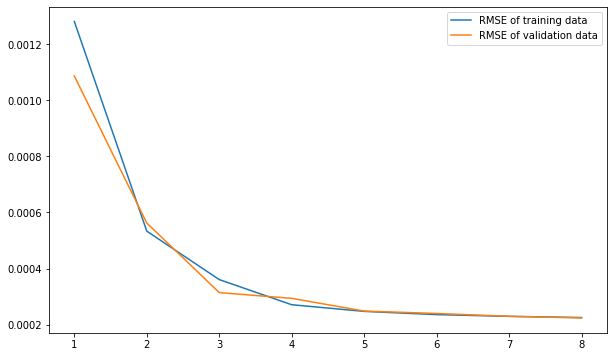

The total time taken is:  2.016916036605835 s
The shortest time taken in Part 5 is:  1.8973579406738281 s


In [ ]:
# Trying step decay method

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = learning_rate[total_time_lr.argmin()]+0.001
CT = rmse(y_test_predict, y_test)*1.001

#Calling function and storing data
rmse_train_adlr3, rmse_val_adlr3, time_adlr3, epoch_adlr3 = Func_P6_stepdecay(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_adlr3[-1], "s")
print("The shortest time taken in Part 5 is: ", min(total_time_lr), "s")

The Total number of epochs is:  7
The final weight is:  [[-8.72394138e-04  1.76567991e-04 -1.03887397e-05 -1.34922413e-04
   5.34441635e-04  2.36565108e-04 -3.35005972e-05  4.61260446e-04
   3.56141450e-04  9.71239142e-05  2.18406724e-04 -4.36022025e-04
   2.13783395e-04  3.19083423e-04  2.72692048e-04  3.38324940e-04
  -2.70532351e-04 -2.32263828e-04 -9.77396712e-05 -2.73041511e-04
   3.45645044e-04  3.32274554e-04 -4.70221432e-04 -2.35487118e-04
   3.80701155e-04  3.96248700e-05  2.12416285e-05 -1.00049897e-06
  -5.74895320e-06 -3.52931423e-05  6.13811205e-06 -1.99396484e-05
  -8.94173593e-06  2.63066472e-06  3.23315808e-05 -3.69198892e-05
  -1.83290338e-05 -3.55043757e-06  1.22672278e-05 -1.09664854e-04
  -4.37931475e-04]]
The final RMSE of training is:  0.00022678545299335465
The final RMSE of testing is:  0.00022338280424151144


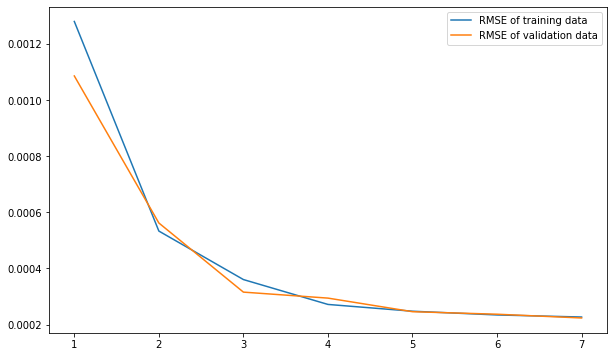

The total time taken is:  1.51127028465271 s
The shortest time taken in Part 5 is:  1.8973579406738281 s


In [ ]:
# Trying expo_decay1 method

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = learning_rate[total_time_lr.argmin()]+0.001
CT = rmse(y_test_predict, y_test)*1.001
m = 0.001

#Calling function and storing data
rmse_train_adlr1, rmse_val_adlr1, time_adlr1, epoch_adlr1 = Func_P6_expodecay1(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, m, max_it=20000)

print("The total time taken is: ", time_adlr1[-1], "s")
print("The shortest time taken in Part 5 is: ", min(total_time_lr), "s")

The Total number of epochs is:  7
The final weight is:  [[-8.72344254e-04  1.76509163e-04 -1.03742386e-05 -1.34970781e-04
   5.35009154e-04  2.36492280e-04 -3.29717061e-05  4.61454094e-04
   3.56486927e-04  9.76686019e-05  2.18662402e-04 -4.36009131e-04
   2.13812928e-04  3.19112490e-04  2.72726868e-04  3.38359424e-04
  -2.70514018e-04 -2.32246428e-04 -9.77257283e-05 -2.73027124e-04
   3.45670688e-04  3.32294559e-04 -4.70218565e-04 -2.35481386e-04
   3.80710774e-04  3.96912030e-05  2.15792761e-05 -1.05788750e-06
  -5.62122013e-06 -3.52687436e-05  6.30851059e-06 -1.99317878e-05
  -8.85316893e-06  2.53626737e-06  3.28445821e-05 -3.69185933e-05
  -1.86502226e-05 -3.56090652e-06  1.25112115e-05 -1.09929577e-04
  -4.37923287e-04]]
The final RMSE of training is:  0.00022699211858091307
The final RMSE of testing is:  0.00022378948898338482


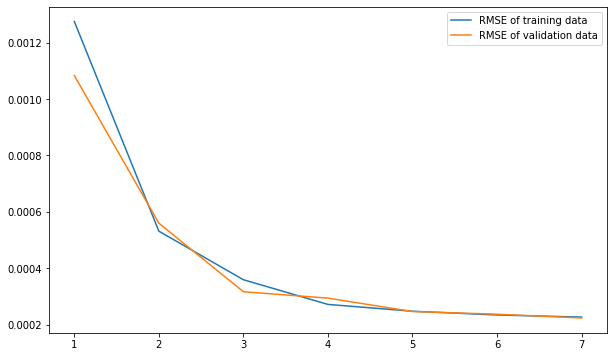

The total time taken is:  2.357830047607422 s
The shortest time taken in Part 5 is:  1.8973579406738281 s


In [ ]:
# Trying expo_decay2 method

x_train = X_train_sd
Y_train = y_train
x_test = X_test_sd
Y_test = y_test
BS = 128
lr = learning_rate[total_time_lr.argmin()]+0.001
CT = rmse(y_test_predict, y_test)*1.001
m = 0.00001

#Calling function and storing data
rmse_train_adlr2, rmse_val_adlr2, time_adlr2, epoch_adlr2 = Func_P6_expodecay2(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, m, max_it=20000)

print("The total time taken is: ", time_adlr2[-1], "s")
print("The shortest time taken in Part 5 is: ", min(total_time_lr), "s")

**2. Plot the training and validation RMSE vs Epoch for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate). [1]**

In [ ]:
total_time_lr_array = np.array([time_lr10, time_lr1, time_lr2, time_lr5, 
                      time_lr3, time_lr8, time_lr4, time_lr6, time_lr11, time_lr9, time_lr7])

total_epoch_lr_array = np.array([epoch_lr10, epoch_lr1, epoch_lr2, epoch_lr5, 
                      epoch_lr3, epoch_lr8, epoch_lr4, epoch_lr6, epoch_lr11, epoch_lr9, epoch_lr7])

total_RMSE_train_lr_array = np.array([rmse_train_lr10, rmse_train_lr1, rmse_train_lr2, rmse_train_lr5, 
                      rmse_train_lr3, rmse_train_lr8, rmse_train_lr4, rmse_train_lr6, rmse_train_lr11, 
                      rmse_train_lr9, rmse_train_lr7])

total_RMSE_val_lr_array = np.array([rmse_val_lr10, rmse_val_lr1, rmse_val_lr2, rmse_val_lr5, 
                      rmse_val_lr3, rmse_val_lr8, rmse_val_lr4, rmse_val_lr6, rmse_val_lr11, 
                      rmse_val_lr9, rmse_val_lr7])

shortest_time_p5 = total_time_lr_array[total_time_lr.argmin()]
shortest_epoch_p5 = total_epoch_lr_array[total_time_lr.argmin()]
shortest_rmse_train_p5 = total_RMSE_train_lr_array[total_time_lr.argmin()]
shortest_rmse_val_p5 = total_RMSE_val_lr_array[total_time_lr.argmin()]

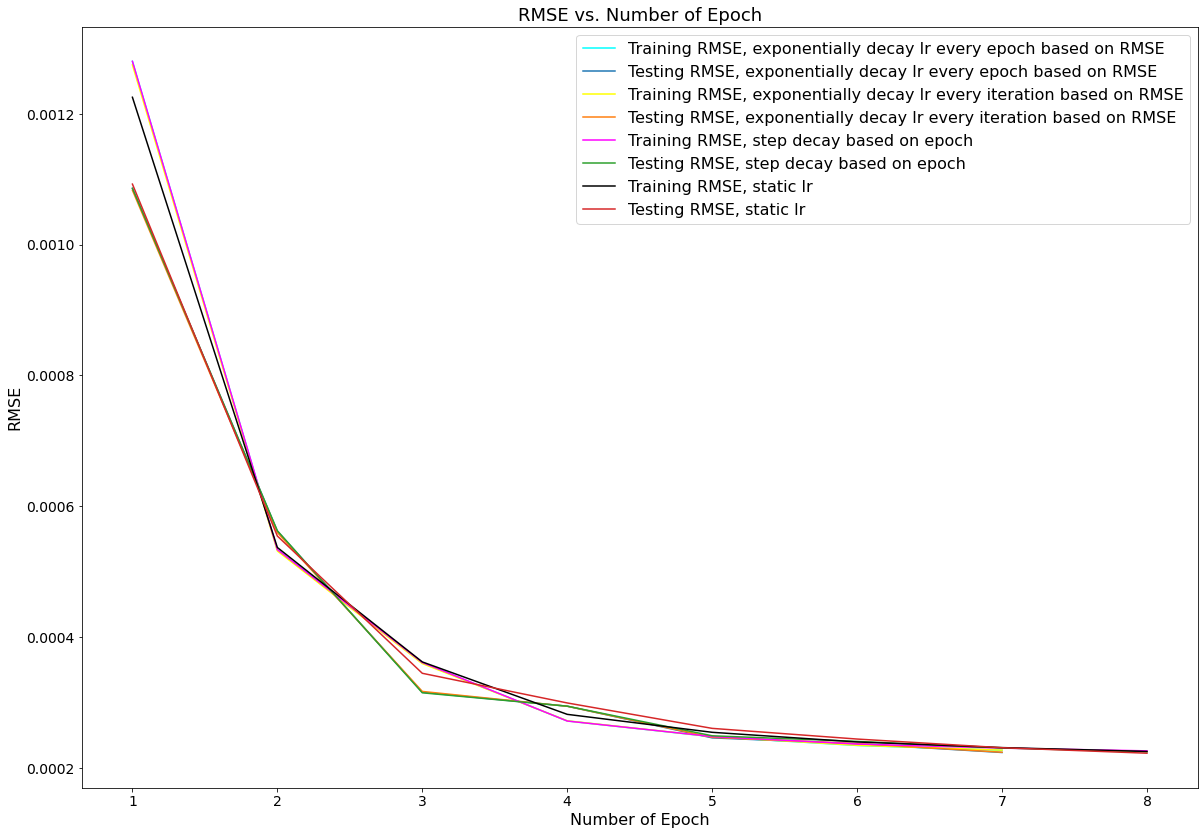

In [ ]:
#Plotting training RMSE vs epoch

plt.figure(figsize=(20, 14))

plt.plot(epoch_adlr1, rmse_train_adlr1, label = 'Training RMSE, exponentially decay lr every epoch based on RMSE', color='cyan')
plt.plot(epoch_adlr1, rmse_val_adlr1, label = 'Testing RMSE, exponentially decay lr every epoch based on RMSE')
plt.plot(epoch_adlr2, rmse_train_adlr2, label = 'Training RMSE, exponentially decay lr every iteration based on RMSE', color='yellow')
plt.plot(epoch_adlr2, rmse_val_adlr2, label = 'Testing RMSE, exponentially decay lr every iteration based on RMSE')
plt.plot(epoch_adlr3, rmse_train_adlr3, label = 'Training RMSE, step decay based on epoch', color='magenta')
plt.plot(epoch_adlr3, rmse_val_adlr3, label = 'Testing RMSE, step decay based on epoch')
plt.plot(shortest_epoch_p5, shortest_rmse_train_p5, label = 'Training RMSE, static lr', color='black')
plt.plot(shortest_epoch_p5, shortest_rmse_val_p5, label = 'Testing RMSE, static lr')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('RMSE vs. Number of Epoch', size=18)
plt.xlabel('Number of Epoch', size=16)
plt.ylabel('RMSE', size=16)
plt.show()

 **3. Plot the training and validation RMSE vs Time for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate).[1]**

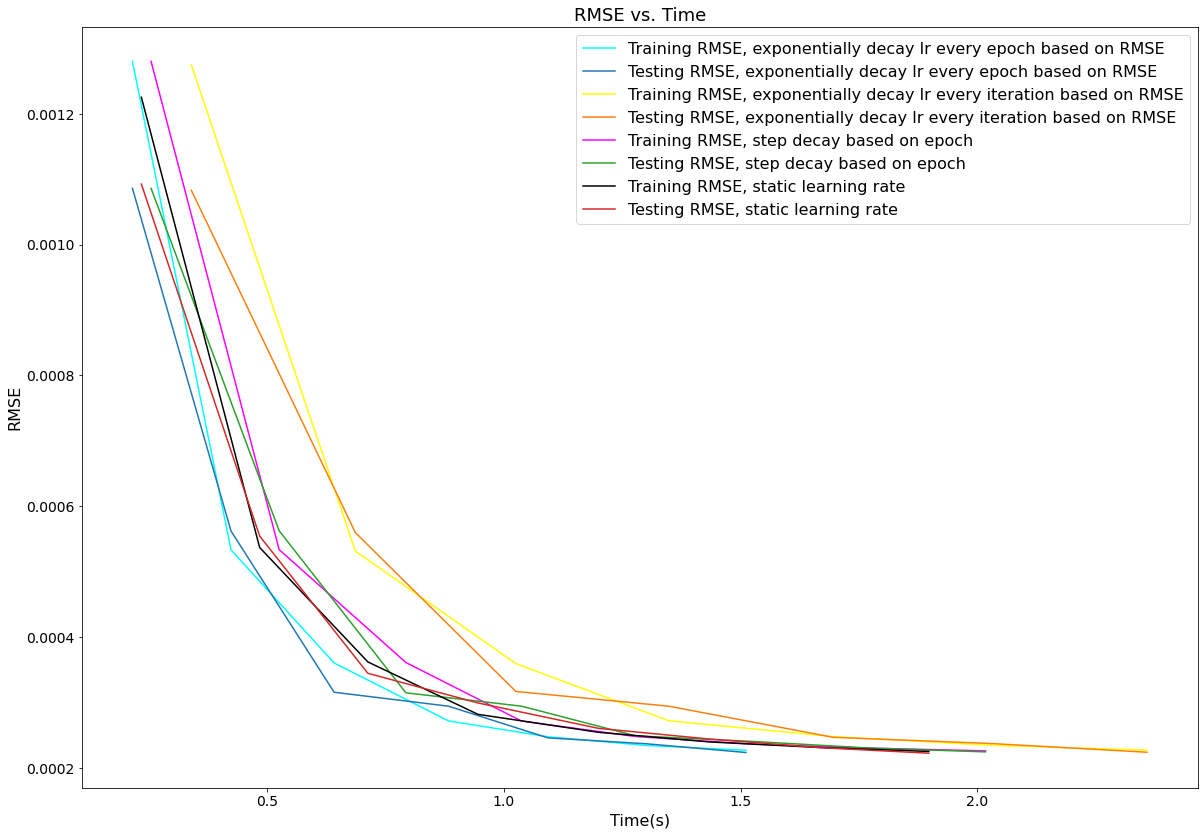

In [ ]:
#Plotting training RMSE vs time

plt.figure(figsize=(20, 14))

plt.plot(time_adlr1, rmse_train_adlr1, label = 'Training RMSE, exponentially decay lr every epoch based on RMSE', color='cyan')
plt.plot(time_adlr1, rmse_val_adlr1, label = 'Testing RMSE, exponentially decay lr every epoch based on RMSE')
plt.plot(time_adlr2, rmse_train_adlr2, label = 'Training RMSE, exponentially decay lr every iteration based on RMSE', color='yellow')
plt.plot(time_adlr2, rmse_val_adlr2, label = 'Testing RMSE, exponentially decay lr every iteration based on RMSE')
plt.plot(time_adlr3, rmse_train_adlr3, label = 'Training RMSE, step decay based on epoch', color='magenta')
plt.plot(time_adlr3, rmse_val_adlr3, label = 'Testing RMSE, step decay based on epoch')
plt.plot(shortest_time_p5, shortest_rmse_train_p5, label = 'Training RMSE, static learning rate', color='black')
plt.plot(shortest_time_p5, shortest_rmse_val_p5, label = 'Testing RMSE, static learning rate')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('RMSE vs. Time', size=18)
plt.xlabel('Time(s)', size=16)
plt.ylabel('RMSE', size=16)
plt.show()

## Part 7 - Gradient Descent with Additional Features and Regularization [3 marks]

Now, we'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

In [ ]:
import pandas as pd
df_toy = pd.read_csv("https://www.eecg.utoronto.ca/~hadizade/APS1070/LR_data.csv" , skipinitialspace=True)

**1. Data Preparation. [0.5]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y). 
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.

In [ ]:
df_toy

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.454481,4.940543,7.116015,3.805131,4.105432,1.832290,5.211909,5.088293,3.841250,6.121133,6.575066e+06
1,4.907182,1.653654,7.339445,9.065282,7.169233,2.354136,2.893005,8.720131,8.646473,3.806860,8.419881e+06
2,1.842804,1.183878,4.203206,6.815847,6.655899,8.295816,3.556779,5.794679,3.260723,5.463808,9.745537e+04
3,2.393457,0.094127,3.208929,0.497443,4.318127,4.999247,9.470238,3.061990,7.312995,5.475240,1.129200e+04
4,5.093724,3.905293,4.858562,4.465484,0.947091,9.410307,8.137329,9.043838,9.128607,0.790795,3.105448e+05
...,...,...,...,...,...,...,...,...,...,...,...
195,2.936450,2.094812,9.493814,3.411240,4.350940,0.386062,1.303290,2.699563,7.622569,3.037162,6.599726e+07
196,4.915597,1.953974,7.312552,9.331203,1.329366,8.286760,5.233018,7.476923,7.043560,5.745565,8.176250e+06
197,6.772096,6.406489,4.638352,7.042340,0.912338,7.568296,1.194928,2.592840,9.386478,4.147710,2.144147e+05
198,3.940339,4.330498,6.693371,9.169265,0.858846,0.601942,2.635455,2.037859,7.883720,8.525164,4.028735e+06


In [ ]:
#Splitting the dataset

df_toy_features = df_toy.drop(['y'], axis = 1)
df_toy_target = pd.DataFrame(data=df_toy['y'])

from sklearn.model_selection import train_test_split
t_X_train, t_X_test, t_y_train, t_y_test = train_test_split(df_toy_features, df_toy_target, test_size=0.2, random_state=1)

**2. Linear Regression. [0.5]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

In [ ]:
#Standardizing the t_X_train and t_X_test

sd_t_X_train = StandardScaler().fit_transform(t_X_train)
t_X_train_sd = pd.DataFrame(sd_t_X_train, columns=df_toy_features.columns)

scaler_toy = StandardScaler().fit(t_X_train)
sd_t_X_test = scaler_toy.transform(t_X_test)
t_X_test_sd = pd.DataFrame(sd_t_X_test, columns=df_toy_features.columns)

In [ ]:
#Adding a column of 1s

t_X_train_sd.insert(0,'b',1)
t_X_test_sd.insert(0,'b',1)

In [ ]:
# Performing linear regression

from sklearn.linear_model import LinearRegression

omg = LinearRegression(fit_intercept=True)
LG = omg.fit(t_X_train_sd, t_y_train)
t_y_train_pred = LG.predict(t_X_train_sd)
t_y_test_pred = LG.predict(t_X_test_sd)

In [ ]:
#Calculating rmse for training and testing set

print('The RMSE of the training set is: ', rmse(t_y_train_pred, t_y_train))
print('The RMSE of the validation set is: ', rmse(t_y_test_pred, t_y_test))

The RMSE of the training set is:  16296980.655667374
The RMSE of the validation set is:  14061578.864980092


**3. Linear Regression with Additional Features. [0.5]**
  * Let's add more features to our dataset (up to degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

In [ ]:
#Adding features to non-standardized data and transform
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(8, include_bias=False)
t_X_train_poly = poly.fit_transform(t_X_train)
t_X_test_poly = poly.fit_transform(t_X_test)

In [ ]:
#Standardizing the t_X_train_poly and t_X_test_poly

sd_t_X_train_poly = StandardScaler().fit_transform(t_X_train_poly)
t_X_train_poly_sd = pd.DataFrame(sd_t_X_train_poly)

scaler_toy_poly = StandardScaler().fit(t_X_train_poly)
sd_t_X_test_poly = scaler_toy_poly.transform(t_X_test_poly)
t_X_test_poly_sd = pd.DataFrame(sd_t_X_test_poly)

In [ ]:
#Adding a column of 1s to both t_X_train_poly and t_X_test_poly

t_X_train_poly_sd.insert(0,'b',1)
t_X_test_poly_sd.insert(0,'b',1)

In [ ]:
# Performing linear regression

LG_2 = LinearRegression().fit(t_X_train_poly_sd, t_y_train)
t_y_train_poly_pred = LG_2.predict(t_X_train_poly_sd)
t_y_test_poly_pred = LG_2.predict(t_X_test_poly_sd)

In [ ]:
#Calculating rmse for training and testing set

print('The RMSE of the training set is: ', rmse(t_y_train_poly_pred, t_y_train))
print('The RMSE of the validation set is: ', rmse(t_y_test_poly_pred, t_y_test))

The RMSE of the training set is:  1.3602886804497203e-07
The RMSE of the validation set is:  10920863.536981942


**4. Linear Regression with Additional Features and Regularization. [0.5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

In [ ]:
# Additional features and regularization

from sklearn.linear_model import Ridge

#Initializing
RMSE_t_train = []
RMSE_t_test = []
alpha_values = []

for i in range (-2,11):
  #fitting the model
  alp = 1*(10**i)
  reg = Ridge(alpha=alp)
  LG_3 = reg.fit(t_X_train_poly_sd, t_y_train)
  alpha_values.append(alp)

  #predict target values
  t_y_train_polyreg_pred = LG_3.predict(t_X_train_poly_sd)
  t_y_test_polyreg_pred = LG_3.predict(t_X_test_poly_sd)

  #calculate RMSE for training and testing
  RMSE_t_train.append(rmse(t_y_train_polyreg_pred, t_y_train))
  RMSE_t_test.append(rmse(t_y_test_polyreg_pred, t_y_test))

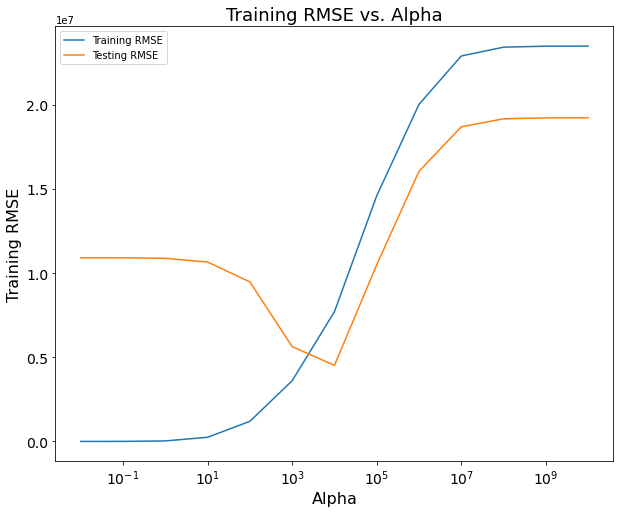

The minimum training RMSE is:  321.01240905183926
The minimum testing RMSE is:  4521905.5835024
The corresponding alpha value for minimum training RMSE is:  0.01
The corresponding alpha value for minimum testing RMSE is:  10000


In [ ]:
#Plotting training and testing RMSE vs. alpha values

plt.figure(figsize=(10, 8))
plt.plot(alpha_values, RMSE_t_train, label='Training RMSE')
plt.plot(alpha_values, RMSE_t_test, label='Testing RMSE')
plt.tick_params(labelsize=14)
plt.title('Training RMSE vs. Alpha', size=18)
plt.xlabel('Alpha', size=16)
plt.ylabel('Training RMSE', size=16)
plt.xscale('log')

plt.legend()
plt.show()

print("The minimum training RMSE is: ", min(RMSE_t_train))
print("The minimum testing RMSE is: ", min(RMSE_t_test))
print("The corresponding alpha value for minimum training RMSE is: ", alpha_values[RMSE_t_train.index(min(RMSE_t_train))])
print("The corresponding alpha value for minimum testing RMSE is: ", alpha_values[RMSE_t_test.index(min(RMSE_t_test))])

**5. Discuss your results. What do you conclude? [1]**

*It is observed that:*

*1) The simple linear regression function results in huge training and testing RMSE values, partly because the targets of the toy dataset have huge values.*

*2) The linear regression model with additional features leads to a more complex model which then results in an overfitting model because the model is overly complex with added features. This model produces extremely small training RMSE values but huge testing RMSE values.*

*3) The linear regression model with additional features and regularization prevents the model from becoming too complex by reducing the estimated coefficients. The key is to find an optimal alpha value. As shown in the graph above, when alpha is smaller than approximately 10^3, the model overfits and results in small training RMSE and huge testing RMSE. When alpha is bigger than 10^3, the model underfits and results in big training and testing RMSE. It is important to find an optimal alpha value where the model is not overly underfitting or overfitting and generates minimum testing RMSE. In this case, the optimal alpha value ranges from 10^3 ~ 10^4, as shown in the graph.*

## Part 8 - Linear Regression with a Custom Dataset [2 marks]


Find a dataset online and train and validate a linear regression model with the techniques you learned in this Project.

*   Introduce your dataset.**[0.5]**
*   Explain your approach. **[0.5]**
*   Summarize your results. **[1]**

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.






**1) Introduce the dataset.**

*The dataset Global Temperatures is taken from the climate change dataset on Kaggle. This dataset includes land temperature data, ocean temperature data and their uncertainties, recorded on the first day of every month starting in January 1850 all the way to December 2015. This dataset shows how the global temeprature changes over 165 years.*

*For this project, I have removed the time&date from the dataset and make the "land and ocean average temperature" as the target, while other data such as "land average", "land max/min temperature", "land and ocean average temperature uncertainty" being the features.*

In [ ]:
#Uploading the dataset

from google.colab import files

uploaded = files.upload()


Saving GlobalTemperatures.csv to GlobalTemperatures (1).csv


In [ ]:
#Printing the dataset

df_temp = pd.read_csv("GlobalTemperatures.csv")
df_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [ ]:
# Process the dataset

df_tempfeatures = df_temp.drop(['dt','LandAndOceanAverageTemperature'], axis = 1)
df_temptarget = pd.DataFrame(data=df_temp['LandAndOceanAverageTemperature'])

# Split the dataset
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(df_tempfeatures, df_temptarget, test_size=0.2, random_state=1)

# Standardizing the temp_X_train and temp_X_test
scaled_temp_X_train = StandardScaler().fit_transform(temp_X_train)
temp_X_train_sd = pd.DataFrame(scaled_temp_X_train, columns=df_tempfeatures.columns)

scaler_3 = StandardScaler().fit(temp_X_train)
scaled_temp_X_test = scaler_3.transform(temp_X_test)
temp_X_test_sd = pd.DataFrame(scaled_temp_X_test, columns=df_tempfeatures.columns)

# Inserting a column of 1s in temp_X_train_sd and temp_X_test_sd as the first column in the dataframe

temp_X_test_sd.insert(0,'b',1)
temp_X_train_sd.insert(0,'b',1)


In [ ]:
# Direct solution

W_temp = np.dot(inv(np.dot(temp_X_train_sd.T, temp_X_train_sd)), np.dot(temp_X_train_sd.T, temp_y_train))

# Prediction

temp_y_train_predict = np.dot(temp_X_train_sd, W_temp)
temp_y_test_predict = np.dot(temp_X_test_sd, W_temp)

# Calculating rmse for training and testing set

print('The RMSE of the training set is: ', rmse(temp_y_train_predict, temp_y_train))
print('The RMSE of the validation set is: ', rmse(temp_y_test_predict, temp_y_test))

The RMSE of the training set is:  0.16836344696862787
The RMSE of the validation set is:  0.17303686697835588


In [ ]:
temp_X_train_sd

,b,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperatureUncertainty
0,1,0.695121,-0.957460,0.689946,-0.598363,0.738515,-0.663209,-1.063622
1,1,-0.015945,1.048316,0.063623,0.594625,0.061298,1.051788,2.051267
2,1,-1.459744,0.074595,-1.423864,-0.269378,-1.503500,0.194290,-0.097870
3,1,1.398649,2.241910,0.801665,4.043989,1.166486,2.026722,2.024063
4,1,-0.674016,-0.526689,-0.622282,-0.541871,-0.714942,-0.559068,-0.492332
...,...,...,...,...,...,...,...,...
1588,1,0.062251,-0.961947,0.106216,-0.673133,0.046082,-0.576794,-0.886794
1589,1,0.687584,0.016261,0.676912,-0.380701,0.686347,-0.304256,-0.097870
1590,1,-1.246354,-0.881177,-1.310050,-0.654856,-1.153057,-0.669856,-0.954805
1591,1,1.280413,0.711777,1.236436,0.938564,1.257780,1.388583,0.976698


**2) Explain my approach.**

*First I repeat part 4 to find an optimal batch size for this dataset, which is determined to be 16. Then with the optimal batch size, I proceed to apply method 2 - exponentially decaying the learning rate after every epoch. The total convergence time using method 2 (With adaptive learning rate) is shorter than the mini-batch gradient descent with static learning rate, as shown in the plot at the end of this section.*

In [ ]:
W_P7 = (np.random.random(temp_X_train_sd.shape[1])/10).reshape(1,-1)

The Total number of epochs is:  893
The final weight is:  [[15.20924455  0.64559455  0.0704497   0.30738165  0.01965257  0.29063541
   0.03086768 -0.20781092]]
The final RMSE of training is:  0.17160390157412775
The final RMSE of testing is:  0.17320938802516894


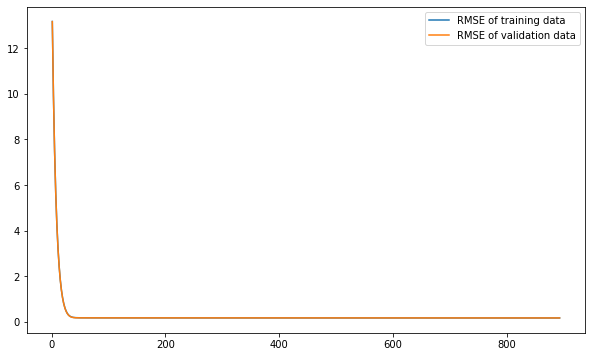

The total time taken is:  25.086970806121826 s


In [ ]:
#when BS = 2^7
x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**7
lr = 0.01
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp207, rmse_val_temp207, time_temp207, epoch_temp207 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_temp207[-1], "s")

The Total number of epochs is:  523
The final weight is:  [[15.2116362   0.66608739  0.06887746  0.29602686  0.02035801  0.28350798
   0.0275729  -0.20260731]]
The final RMSE of training is:  0.1712027479604324
The final RMSE of testing is:  0.17320861745183147


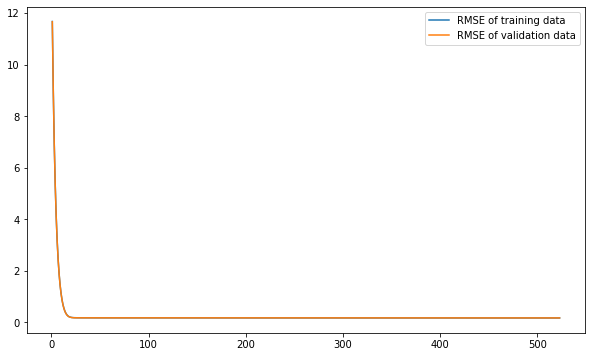

The total time taken is:  25.842146635055542 s


In [ ]:
#when BS = 2^6
x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**6
lr = 0.01
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp206, rmse_val_temp206, time_temp206, epoch_temp206 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_temp206[-1], "s")

The Total number of epochs is:  1547
The final weight is:  [[15.20548151  0.63617156  0.07273267  0.31483817  0.018083    0.2888123
   0.0370778  -0.21712285]]
The final RMSE of training is:  0.1721636914531081
The final RMSE of testing is:  0.17320930642779303


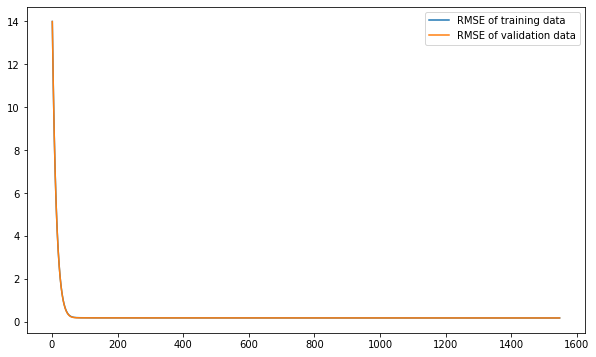

The total time taken is:  29.920116186141968 s


In [ ]:
#when BS = 2^8
x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**8
lr = 0.01
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp208, rmse_val_temp208, time_temp208, epoch_temp208 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_temp208[-1], "s")

The Total number of epochs is:  3164
The final weight is:  [[ 1.52003631e+01  6.73042570e-01  7.75318195e-02  3.03717218e-01
   1.51801597e-02  2.57590908e-01  4.74139722e-02 -2.32917307e-01]]
The final RMSE of training is:  0.1727611466332747
The final RMSE of testing is:  0.17320963666948955


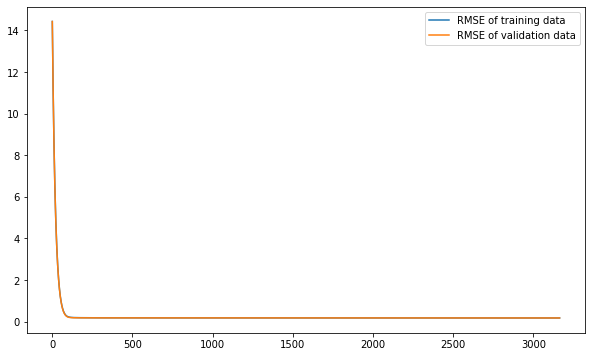

The total time taken is:  41.38298511505127 s


In [ ]:
#when BS = 2^9
x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**9
lr = 0.01
CT2 = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp209, rmse_val_temp209, time_temp209, epoch_temp209 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT2, W_func, max_it=20000)

print("The total time taken is: ", time_temp209[-1], "s")

The Total number of epochs is:  260
The final weight is:  [[15.21275591  0.65840574  0.06485413  0.29928975  0.02075524  0.28633676
   0.02650169 -0.19814058]]
The final RMSE of training is:  0.1713311712518583
The final RMSE of testing is:  0.17320730743786705


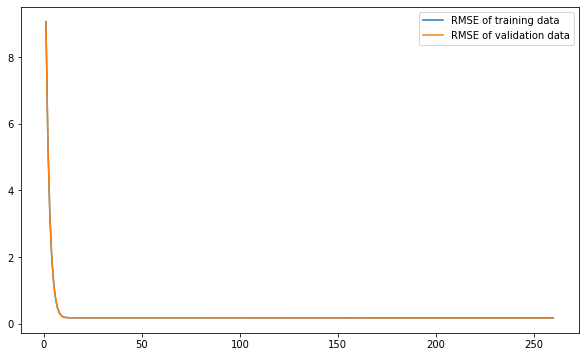

The total time taken is:  24.437845706939697 s


In [ ]:
#when BS = 2^5

x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**5
lr = 0.01
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp205, rmse_val_temp205, time_temp205, epoch_temp205 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_temp205[-1], "s")

The Total number of epochs is:  139
The final weight is:  [[15.21400615  0.6742871   0.06339683  0.28916729  0.02037548  0.27638963
   0.02556077 -0.2008915 ]]
The final RMSE of training is:  0.17139268894538484
The final RMSE of testing is:  0.17320381408171986


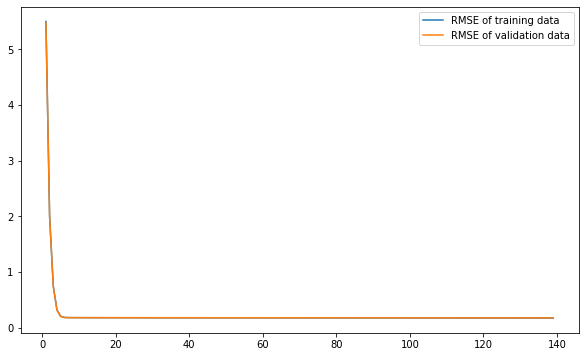

The total time taken is:  22.09576916694641 s


In [ ]:
#when BS = 2^4

x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**4
lr = 0.01
CT2 = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp204, rmse_val_temp204, time_temp204, epoch_temp204 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT2, W_func, max_it=20000)

print("The total time taken is: ", time_temp204[-1], "s")

The Total number of epochs is:  85
The final weight is:  [[15.21432645  0.72329617  0.06480421  0.2664813   0.01758195  0.24951735
   0.02425101 -0.20378306]]
The final RMSE of training is:  0.17106878768677158
The final RMSE of testing is:  0.17320661880261093


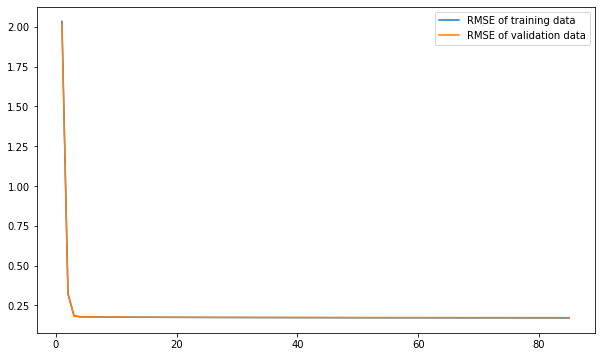

The total time taken is:  23.211549520492554 s


In [ ]:
#when BS = 2^3

x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**3
lr = 0.01
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp203, rmse_val_temp203, time_temp203, epoch_temp203 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_temp203[-1], "s")

The Total number of epochs is:  50
The final weight is:  [[15.21388941  0.76361332  0.06101504  0.24619542  0.01534957  0.22480322
   0.02344679 -0.2054811 ]]
The final RMSE of training is:  0.17156533265598473
The final RMSE of testing is:  0.17369307028907208


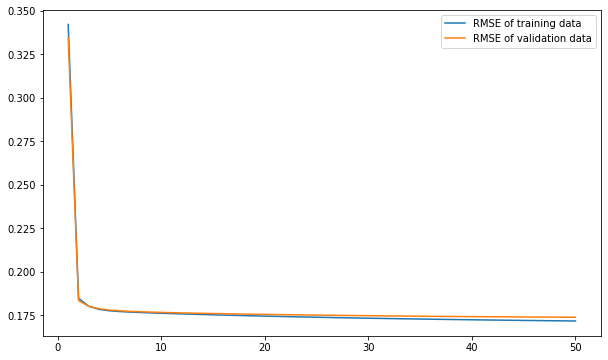

The total time taken is:  25.377776861190796 s


In [ ]:
#when BS = 2^2

x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**2
lr = 0.01
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7

#Calling function and storing data
rmse_train_temp202, rmse_val_temp202, time_temp202, epoch_temp202 = Func_P4(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, max_it=20000)

print("The total time taken is: ", time_temp202[-1], "s")

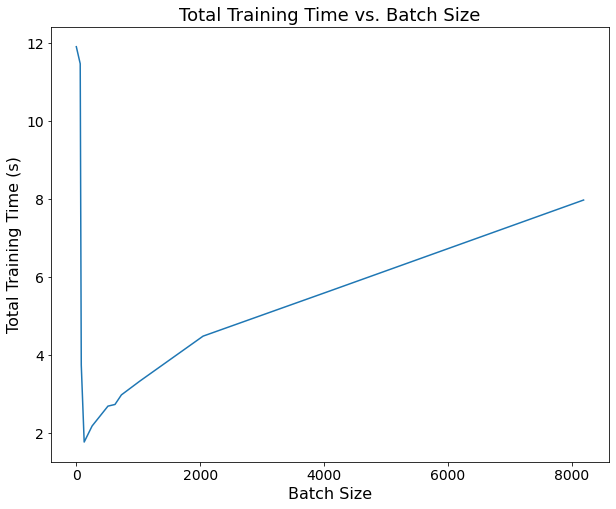

The minimum total training time is:  22.09576916694641 s
The corresponding batch size is:  16


In [ ]:
#Plotting total training time vs batch size

total_time_temp =np.array([time_temp209[-1], time_temp208[-1], time_temp207[-1], time_temp206[-1], 
                      time_temp205[-1], time_temp204[-1], time_temp203[-1], time_temp202[-1]])

batch_size_temp =np.array([512, 256, 128, 64, 32, 16, 8, 4])

plt.figure(figsize=(10, 8))
plt.plot(batch_size, total_time)
plt.tick_params(labelsize=14)
plt.title('Total Training Time vs. Batch Size', size=18)
plt.xlabel('Batch Size', size=16)
plt.ylabel('Total Training Time (s)', size=16)
plt.show()

print("The minimum total training time is: ", min(total_time_temp), "s")
print("The corresponding batch size is: ", batch_size_temp[total_time_temp.argmin()])

The Total number of epochs is:  103
The final weight is:  [[15.2143206   0.69807146  0.06281332  0.2768274   0.01936521  0.26104311
   0.02483967 -0.20311353]]
The final RMSE of training is:  0.1715016660366458
The final RMSE of testing is:  0.17320616267374656


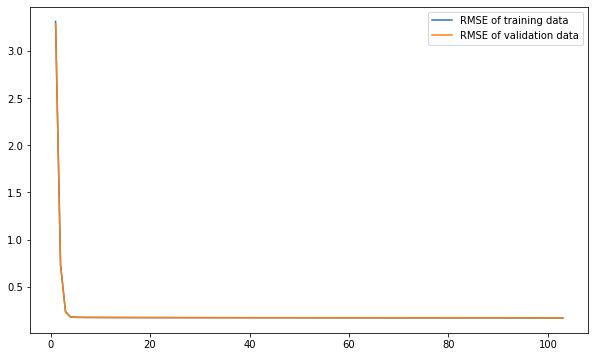

The total time taken is:  15.814115762710571 s
The shortest time taken is:  22.09576916694641 s


In [ ]:
# Chossing 2^4 to be the opitmal batch size
# Exponentially decaying lr every iteration based on RMSE method

x_train = temp_X_train_sd
Y_train = temp_y_train
x_test = temp_X_test_sd
Y_test = temp_y_test
BS = 2**4
lr = 0.015
CT = rmse(temp_y_test_predict, temp_y_test)*1.001
W_func = W_P7
m = 0.000015

#Calling function and storing data
rmse_train_temp, rmse_val_temp, time_temp, epoch_temp = Func_P6_expodecay1(x_train, Y_train, x_test, Y_test, BS, lr, CT, W_func, m, max_it=20000)

print("The total time taken is: ", time_temp[-1], "s")
print("The shortest time taken is: ", min(total_time_temp), "s")

**3) Summarize my results.**

*As shown by the plots below, exponential decay after every epoch based on RMSE results in fewer number of epochs and less convergence time compared to static learning rate. However, for both methods shown, the model is slightly underfitting as the training RMSE curve lies above the testing RMSE curve.*

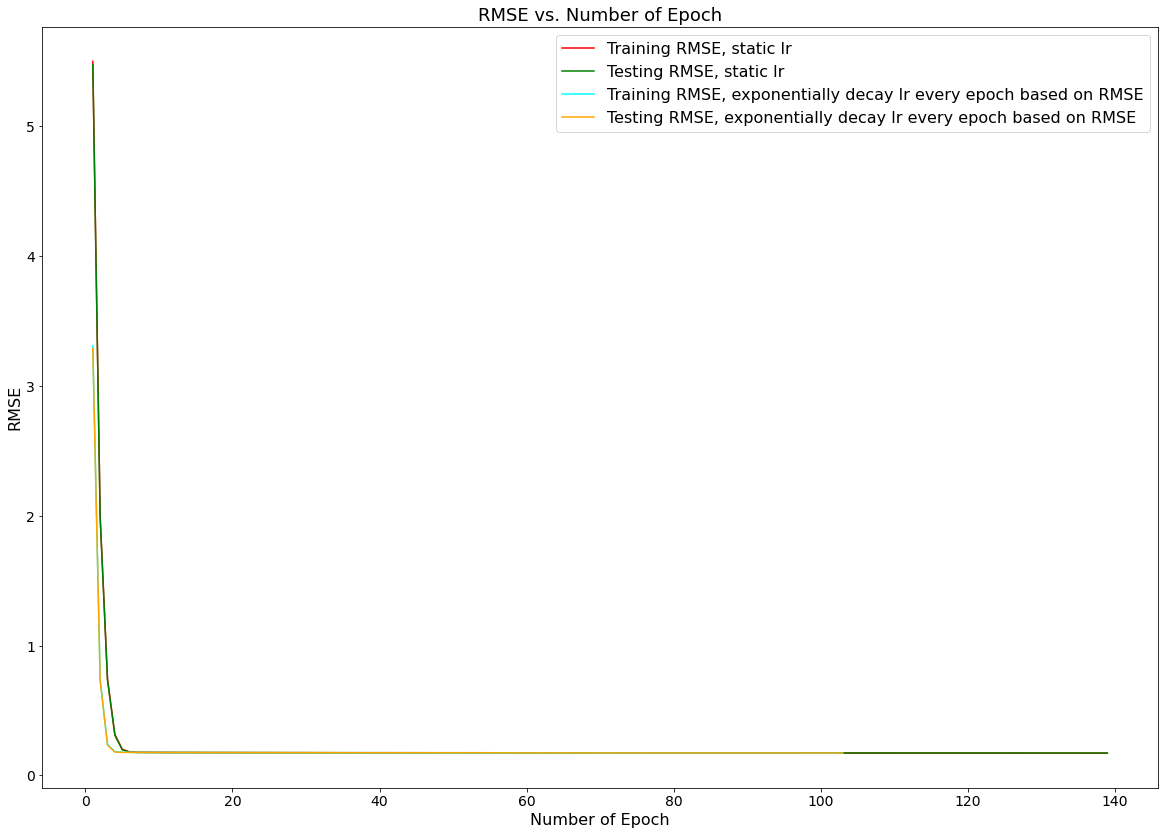

In [ ]:
#Plotting RMSE vs epoch

plt.figure(figsize=(20, 14))

plt.plot(epoch_temp204, rmse_train_temp204, label = 'Training RMSE, static lr', color='red')
plt.plot(epoch_temp204, rmse_val_temp204, label = 'Testing RMSE, static lr', color='green')
plt.plot(epoch_temp, rmse_train_temp, label = 'Training RMSE, exponentially decay lr every epoch based on RMSE', color='cyan')
plt.plot(epoch_temp, rmse_val_temp, label = 'Testing RMSE, exponentially decay lr every epoch based on RMSE', color='orange')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('RMSE vs. Number of Epoch', size=18)
plt.xlabel('Number of Epoch', size=16)
plt.ylabel('RMSE', size=16)
plt.show()

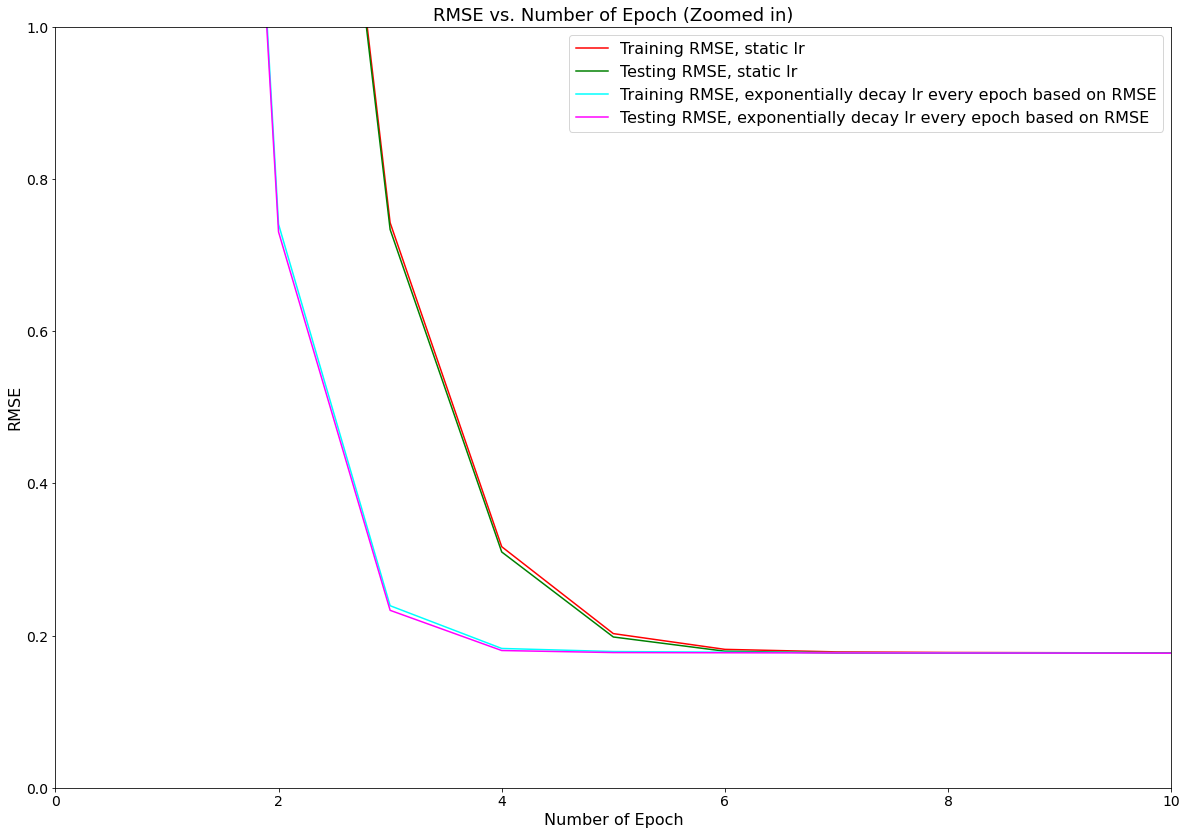

In [ ]:
#Plotting RMSE vs number of epoch zoomed in

plt.figure(figsize=(20, 14))

plt.plot(epoch_temp204, rmse_train_temp204, label = 'Training RMSE, static lr', color='red')
plt.plot(epoch_temp204, rmse_val_temp204, label = 'Testing RMSE, static lr', color='green')
plt.plot(epoch_temp, rmse_train_temp, label = 'Training RMSE, exponentially decay lr every epoch based on RMSE', color='cyan')
plt.plot(epoch_temp, rmse_val_temp, label = 'Testing RMSE, exponentially decay lr every epoch based on RMSE', color='magenta')

plt.xlim(0,10)
plt.ylim(0,1)
plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('RMSE vs. Number of Epoch (Zoomed in)', size=18)
plt.xlabel('Number of Epoch', size=16)
plt.ylabel('RMSE', size=16)
plt.show()

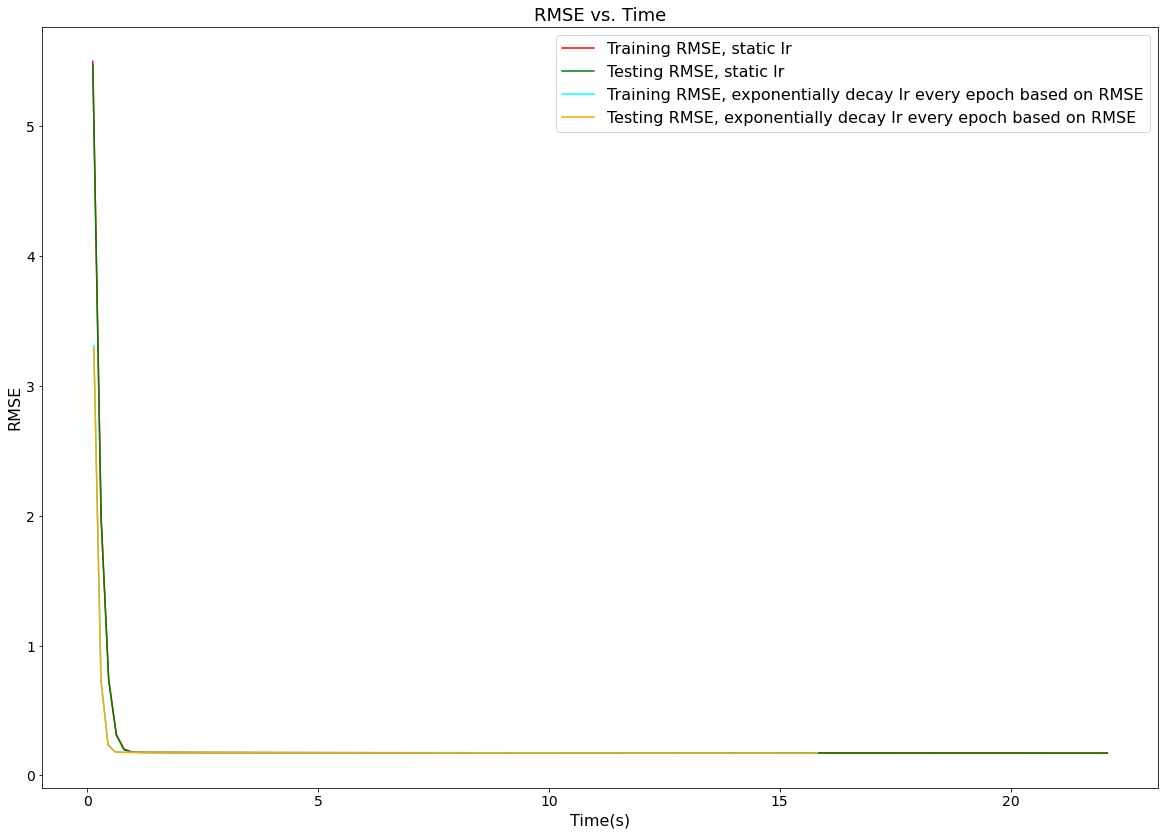

In [ ]:
#Plotting RMSE vs time

plt.figure(figsize=(20, 14))

plt.plot(time_temp204, rmse_train_temp204, label = 'Training RMSE, static lr', color='red')
plt.plot(time_temp204, rmse_val_temp204, label = 'Testing RMSE, static lr', color='green')
plt.plot(time_temp, rmse_train_temp, label = 'Training RMSE, exponentially decay lr every epoch based on RMSE', color='cyan')
plt.plot(time_temp, rmse_val_temp, label = 'Testing RMSE, exponentially decay lr every epoch based on RMSE', color='orange')

plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('RMSE vs. Time', size=18)
plt.xlabel('Time(s)', size=16)
plt.ylabel('RMSE', size=16)
plt.show()

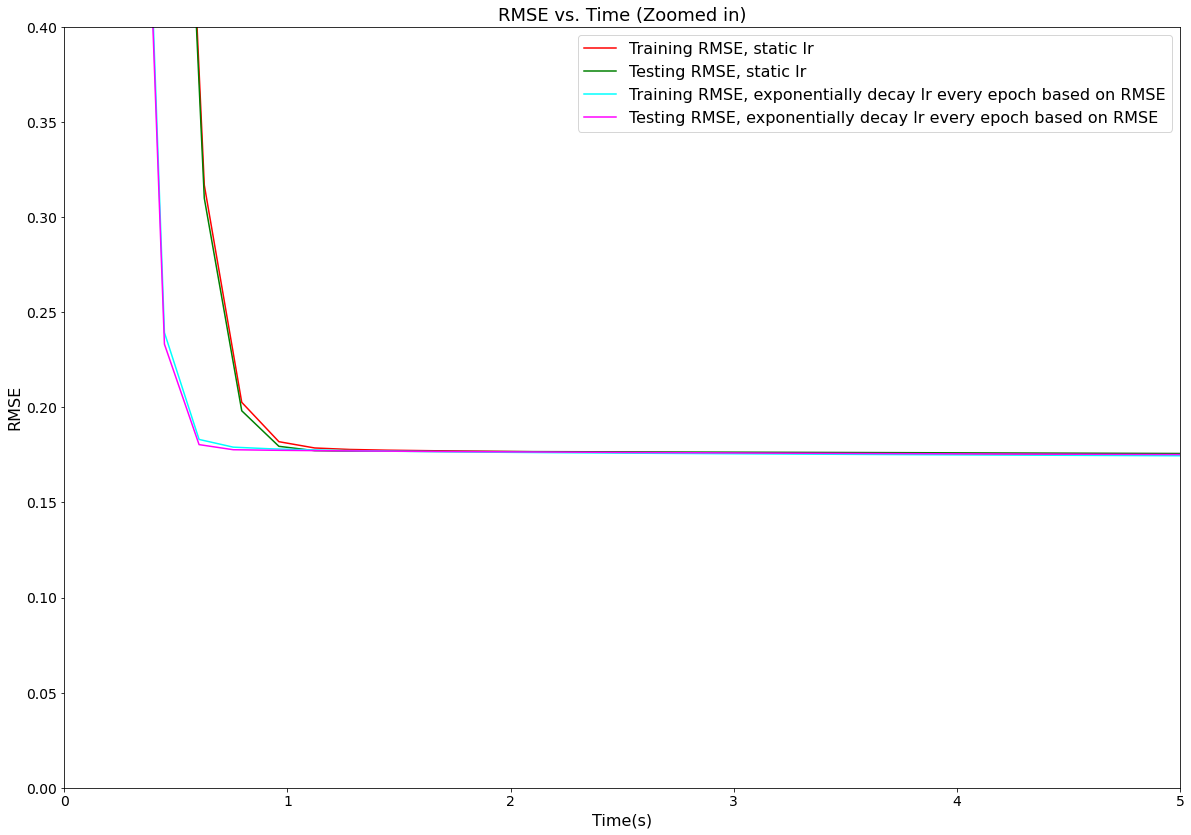

In [ ]:
#Plotting RMSE vs time zoomed in

plt.figure(figsize=(20, 14))

plt.plot(time_temp204, rmse_train_temp204, label = 'Training RMSE, static lr', color='red')
plt.plot(time_temp204, rmse_val_temp204, label = 'Testing RMSE, static lr', color='green')
plt.plot(time_temp, rmse_train_temp, label = 'Training RMSE, exponentially decay lr every epoch based on RMSE', color='cyan')
plt.plot(time_temp, rmse_val_temp, label = 'Testing RMSE, exponentially decay lr every epoch based on RMSE', color='magenta')

plt.xlim(0,5)
plt.ylim(0,0.4)
plt.tick_params(labelsize=14)
plt.legend(prop={"size":16})
plt.title('RMSE vs. Time (Zoomed in)', size=18)
plt.xlabel('Time(s)', size=16)
plt.ylabel('RMSE', size=16)
plt.show()